# **Projeto 1: Análise de Excesso de Mortes por COVID-19**

## Certificação de Análise de Dados da Laboratória e IBM

### Países analisados: Brasil, Chile, Colômbia, México e Peru

Segundo a mídia o Peru tem sido o país mais afetado pela Covid, em relação ao número de mortes. Em um grupo de pessoas de vários países da América Latina esse assunto entra em discussão e, cada pessoa apresenta dados e relatos alarmantes sobre seu país o que leva o grupo a questionar se de fato a afirmação da midia era correta. Deste modo, em conjunto elencam pontos importantes a serem considerados em uma análise dessa envergadura, tais como: a análise de mortes devido à pandemia; total acumulado de mortes; cálculo das mortes a cada 100.000 habitantes de modo a tornar comparável os resultado entre os países independente da sua quantidade de habitantes (visto que, países com maior contingente populacional tenderão a apresentar maior número de mortes); cálculo do excesso de mortes ao longo do período pandêmico. Este último ponto, o excesso do número de mortes calculado com base em números de anos anteriores foi o escolhido, pelo grupo, como índice que melhor responderia aos questionamentos do grupo. Pois o número oficial de mortes pode ter desconsiderado casos onde não houve declaração da causa da morte.

Posto isso, essa análise teve como objetivo analisar em qual país (Brasil, Chile, Colômbia, México e Peru) apresentou o maior número de mortes por Covid-19. Assim como o excesso de mortes contabilizados ao longo da pandemia de Covid-19 e as perguntas a serem respondidas foram:

- Qual país apresentou o maior número de mortes por Covid?
- Qual país apresentou a **maior** diferença entre o número de mortes reportadas por Covid e o excesso de mortes ao longo do período pandêmico?
- Qual país apresentou a **menor** diferença entre o número de mortes reportadas por Covid e o excesso de mortes ao longo do período pandêmico?

Essa tarefa foi originalmente realizada no Google Spreadsheet. Neste no e aqui fiz o exercício de reproduzí-la em Python de modo a fixar a compreensão dos passos adotados e, ainda, aprender novos meios de realizar a mesma análise com ferramentas distintas.

In [1]:
#Importando as bibliotecas e definindo configurações
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Colocando cada aba da planilha em um df específico
df1 = pd.read_excel('Projeto1_-_MortesCOVID/COVID_Dataset.xlsx', sheet_name='Dataset')
df2 = pd.read_excel('Projeto1_-_MortesCOVID/COVID_Dataset.xlsx', sheet_name='Poblacion')

In [3]:
df1

,país,data início,data fim,dias,semana,total mortes reportadas,total mortes reportadas por covid
0,Mexico,2014-12-29,2015-01-04,7,1,15101,0
1,Mexico,2015-01-05,2015-01-11,7,2,15449,0
2,Mexico,2015-01-12,2015-01-18,7,3,14820,0
3,Mexico,2015-01-19,2015-01-25,7,4,14172,0
4,Mexico,2015-01-26,2015-02-01,7,5,13628,0
...,...,...,...,...,...,...,...
1327,Brazil,2021-05-01,2021-05-31,31,5,178877,59010
1328,Brazil,2021-06-01,2021-06-30,30,6,178844,55275
1329,Brazil,2021-07-01,2021-07-31,31,7,162439,38304
1330,Brazil,2021-08-01,2021-08-31,31,8,149206,24043


In [4]:
df2

,Pais,Poblacion
0,Mexico,130262220
1,Peru,33359415
2,Chile,19212362
3,Brazil,213993441
4,Colombia,51265841


## Cáculo das Mortes Relatadas por COVID a cada 100.000 habitantes

In [5]:
# Unindo as informações em um único DataFrame:
df = pd.merge(df1, df2, left_on='país', right_on='Pais', how='left')

In [6]:
# A coluna país ficou duplicada, por isso abaixo excluo uma delas: 
del df['Pais']

In [7]:
# Visualizando o resultado:
df

,país,data início,data fim,dias,semana,total mortes reportadas,total mortes reportadas por covid,Poblacion
0,Mexico,2014-12-29,2015-01-04,7,1,15101,0,130262220
1,Mexico,2015-01-05,2015-01-11,7,2,15449,0,130262220
2,Mexico,2015-01-12,2015-01-18,7,3,14820,0,130262220
3,Mexico,2015-01-19,2015-01-25,7,4,14172,0,130262220
4,Mexico,2015-01-26,2015-02-01,7,5,13628,0,130262220
...,...,...,...,...,...,...,...,...
1327,Brazil,2021-05-01,2021-05-31,31,5,178877,59010,213993441
1328,Brazil,2021-06-01,2021-06-30,30,6,178844,55275,213993441
1329,Brazil,2021-07-01,2021-07-31,31,7,162439,38304,213993441
1330,Brazil,2021-08-01,2021-08-31,31,8,149206,24043,213993441


Abaixo crio uma nova coluna no dataframe (df), a qual será denomidade de **morteCovid100milhab**. Esta coluna será preenchida pelo resultado do cálculo das mortes reportadas por Covid a cada 100.000 habitantes (total mortes reportadas por covid), calculado pelo nº de mortes reportadas por covid multiplicado por 100000, o resultado dessa multiplicação é dividido pela população do país (Poblacion), conforme especificação abaixo:

In [8]:
df['morteCovid100milhab'] = df['total mortes reportadas por covid']*100000/df['Poblacion']

In [9]:
# Visualizando o resultado
df

,país,data início,data fim,dias,semana,total mortes reportadas,total mortes reportadas por covid,Poblacion,morteCovid100milhab
0,Mexico,2014-12-29,2015-01-04,7,1,15101,0,130262220,0.000000
1,Mexico,2015-01-05,2015-01-11,7,2,15449,0,130262220,0.000000
2,Mexico,2015-01-12,2015-01-18,7,3,14820,0,130262220,0.000000
3,Mexico,2015-01-19,2015-01-25,7,4,14172,0,130262220,0.000000
4,Mexico,2015-01-26,2015-02-01,7,5,13628,0,130262220,0.000000
...,...,...,...,...,...,...,...,...,...
1327,Brazil,2021-05-01,2021-05-31,31,5,178877,59010,213993441,27.575612
1328,Brazil,2021-06-01,2021-06-30,30,6,178844,55275,213993441,25.830231
1329,Brazil,2021-07-01,2021-07-31,31,7,162439,38304,213993441,17.899614
1330,Brazil,2021-08-01,2021-08-31,31,8,149206,24043,213993441,11.235391


In [10]:
# Salvando o DataFrame como planilha do excel
df.to_excel('Projeto1_-_MortesCOVID/DataFrame.xlsx')

## Organizando os dados para cada um dos países

## **Peru**

In [11]:
# Criando um dataframe apenas com os dados do Peru:
peru = df[df['país'] == 'Peru']

O cálculo do acúmulo de mortes por Covid a cada 100.000 habitantes foi feito com uma função nativa do pacote Pandas a **cumsum** e o resultado inserido na nova coluna **MortesAcumuladas**:

In [12]:
peru['MortesAcumuladas'] = peru['morteCovid100milhab'].cumsum()
peru

,país,data início,data fim,dias,semana,total mortes reportadas,total mortes reportadas por covid,Poblacion,morteCovid100milhab,MortesAcumuladas
354,Peru,2017-01-02,2017-01-08,7,1,1586,0,33359415,0.000000,0.000000
355,Peru,2017-01-09,2017-01-15,7,2,1672,0,33359415,0.000000,0.000000
356,Peru,2017-01-16,2017-01-22,7,3,1740,0,33359415,0.000000,0.000000
357,Peru,2017-01-23,2017-01-29,7,4,1760,0,33359415,0.000000,0.000000
358,Peru,2017-01-30,2017-02-05,7,5,1881,0,33359415,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
602,Peru,2021-10-04,2021-10-10,7,40,2951,190,33359415,0.569554,598.556659
603,Peru,2021-10-11,2021-10-17,7,41,2855,168,33359415,0.503606,599.060265
604,Peru,2021-10-18,2021-10-24,7,42,2831,209,33359415,0.626510,599.686775
605,Peru,2021-10-25,2021-10-31,7,43,2754,194,33359415,0.581545,600.268320


Criando uma variável (est_morte) para armazenar o total de mortes em períodos anteriores à pandemia. E, deste modo, obter uma estimativa do número de mortes esperado - caso a pandemia não tivesse ocorrido - a partir da média da quantidade de mortes no mesmo período em anos anteriores.

In [13]:
est_morte = peru[peru['total mortes reportadas por covid'] == 0]
est_morte

,país,data início,data fim,dias,semana,total mortes reportadas,total mortes reportadas por covid,Poblacion,morteCovid100milhab,MortesAcumuladas
354,Peru,2017-01-02,2017-01-08,7,1,1586,0,33359415,0.0,0.0
355,Peru,2017-01-09,2017-01-15,7,2,1672,0,33359415,0.0,0.0
356,Peru,2017-01-16,2017-01-22,7,3,1740,0,33359415,0.0,0.0
357,Peru,2017-01-23,2017-01-29,7,4,1760,0,33359415,0.0,0.0
358,Peru,2017-01-30,2017-02-05,7,5,1881,0,33359415,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
514,Peru,2020-01-27,2020-02-02,7,5,2255,0,33359415,0.0,0.0
515,Peru,2020-02-03,2020-02-09,7,6,2330,0,33359415,0.0,0.0
516,Peru,2020-02-10,2020-02-16,7,7,2354,0,33359415,0.0,0.0
517,Peru,2020-02-17,2020-02-23,7,8,2346,0,33359415,0.0,0.0


Em seguida agruparei em uma nova variável (grupo_semana) os valores por semana. E depois calculei a média do total de mortes para cada semana e armazenei o resultado em uma series que foi agrupada ao dataframe do Peru (merge). Deste modo obtive um valor estimado do número de mortes esperado naquela mesma semana conforme o comportamento de anos anteriores.

In [14]:
# Agrupando por semana
grupo_semana = est_morte.groupby('semana')

In [15]:
# Calculando a média
estimativa_pre_covid = grupo_semana['total mortes reportadas'].mean()

In [16]:
# Unindo o resultado ao DataFrame do Peru
peru = pd.merge(peru, estimativa_pre_covid, left_on='semana', right_on='semana', how='left')
peru

,país,data início,data fim,dias,semana,total mortes reportadas_x,total mortes reportadas por covid,Poblacion,morteCovid100milhab,MortesAcumuladas,total mortes reportadas_y
0,Peru,2017-01-02,2017-01-08,7,1,1586,0,33359415,0.000000,0.000000,2054.500000
1,Peru,2017-01-09,2017-01-15,7,2,1672,0,33359415,0.000000,0.000000,2051.500000
2,Peru,2017-01-16,2017-01-22,7,3,1740,0,33359415,0.000000,0.000000,2030.750000
3,Peru,2017-01-23,2017-01-29,7,4,1760,0,33359415,0.000000,0.000000,2049.250000
4,Peru,2017-01-30,2017-02-05,7,5,1881,0,33359415,0.000000,0.000000,2092.250000
...,...,...,...,...,...,...,...,...,...,...,...
248,Peru,2021-10-04,2021-10-10,7,40,2951,190,33359415,0.569554,598.556659,2151.666667
249,Peru,2021-10-11,2021-10-17,7,41,2855,168,33359415,0.503606,599.060265,2191.666667
250,Peru,2021-10-18,2021-10-24,7,42,2831,209,33359415,0.626510,599.686775,2233.000000
251,Peru,2021-10-25,2021-10-31,7,43,2754,194,33359415,0.581545,600.268320,2185.666667


In [17]:
# Excluindo do DataFrame do Peru os dados pré-Covid
peru = peru[peru['data início'] >= '2020-3-2']
peru

,país,data início,data fim,dias,semana,total mortes reportadas_x,total mortes reportadas por covid,Poblacion,morteCovid100milhab,MortesAcumuladas,total mortes reportadas_y
165,Peru,2020-03-02,2020-03-08,7,10,2409,2,33359415,0.005995,0.005995,2008.333333
166,Peru,2020-03-09,2020-03-15,7,11,2469,3,33359415,0.008993,0.014988,2051.666667
167,Peru,2020-03-16,2020-03-22,7,12,2185,29,33359415,0.086932,0.101920,1996.000000
168,Peru,2020-03-23,2020-03-29,7,13,2150,61,33359415,0.182857,0.284777,1960.000000
169,Peru,2020-03-30,2020-04-05,7,14,2390,222,33359415,0.665479,0.950256,1968.000000
...,...,...,...,...,...,...,...,...,...,...,...
248,Peru,2021-10-04,2021-10-10,7,40,2951,190,33359415,0.569554,598.556659,2151.666667
249,Peru,2021-10-11,2021-10-17,7,41,2855,168,33359415,0.503606,599.060265,2191.666667
250,Peru,2021-10-18,2021-10-24,7,42,2831,209,33359415,0.626510,599.686775,2233.000000
251,Peru,2021-10-25,2021-10-31,7,43,2754,194,33359415,0.581545,600.268320,2185.666667


In [18]:
# Comparando o total de mortes reportadas com o número de mortes totais ao longo da pandemia de Covid e obtendo o excesso de mortes observadas a partir de subtração de valores:
peru['excesso_morte'] = peru['total mortes reportadas_x'] - peru['total mortes reportadas_y']
peru

,país,data início,data fim,dias,semana,total mortes reportadas_x,total mortes reportadas por covid,Poblacion,morteCovid100milhab,MortesAcumuladas,total mortes reportadas_y,excesso_morte
165,Peru,2020-03-02,2020-03-08,7,10,2409,2,33359415,0.005995,0.005995,2008.333333,400.666667
166,Peru,2020-03-09,2020-03-15,7,11,2469,3,33359415,0.008993,0.014988,2051.666667,417.333333
167,Peru,2020-03-16,2020-03-22,7,12,2185,29,33359415,0.086932,0.101920,1996.000000,189.000000
168,Peru,2020-03-23,2020-03-29,7,13,2150,61,33359415,0.182857,0.284777,1960.000000,190.000000
169,Peru,2020-03-30,2020-04-05,7,14,2390,222,33359415,0.665479,0.950256,1968.000000,422.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
248,Peru,2021-10-04,2021-10-10,7,40,2951,190,33359415,0.569554,598.556659,2151.666667,799.333333
249,Peru,2021-10-11,2021-10-17,7,41,2855,168,33359415,0.503606,599.060265,2191.666667,663.333333
250,Peru,2021-10-18,2021-10-24,7,42,2831,209,33359415,0.626510,599.686775,2233.000000,598.000000
251,Peru,2021-10-25,2021-10-31,7,43,2754,194,33359415,0.581545,600.268320,2185.666667,568.333333


In [19]:
# Calculando a taxa de excesso de mortes a cada 100.000 habitantes
peru['Excesso de Mortes de COVID por 100000hab'] = peru['excesso_morte']*100000/peru['Poblacion']
peru

,país,data início,data fim,dias,semana,total mortes reportadas_x,total mortes reportadas por covid,Poblacion,morteCovid100milhab,MortesAcumuladas,total mortes reportadas_y,excesso_morte,Excesso de Mortes de COVID por 100000hab
165,Peru,2020-03-02,2020-03-08,7,10,2409,2,33359415,0.005995,0.005995,2008.333333,400.666667,1.201060
166,Peru,2020-03-09,2020-03-15,7,11,2469,3,33359415,0.008993,0.014988,2051.666667,417.333333,1.251021
167,Peru,2020-03-16,2020-03-22,7,12,2185,29,33359415,0.086932,0.101920,1996.000000,189.000000,0.566557
168,Peru,2020-03-23,2020-03-29,7,13,2150,61,33359415,0.182857,0.284777,1960.000000,190.000000,0.569554
169,Peru,2020-03-30,2020-04-05,7,14,2390,222,33359415,0.665479,0.950256,1968.000000,422.000000,1.265010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,Peru,2021-10-04,2021-10-10,7,40,2951,190,33359415,0.569554,598.556659,2151.666667,799.333333,2.396125
249,Peru,2021-10-11,2021-10-17,7,41,2855,168,33359415,0.503606,599.060265,2191.666667,663.333333,1.988444
250,Peru,2021-10-18,2021-10-24,7,42,2831,209,33359415,0.626510,599.686775,2233.000000,598.000000,1.792597
251,Peru,2021-10-25,2021-10-31,7,43,2754,194,33359415,0.581545,600.268320,2185.666667,568.333333,1.703667


In [20]:
# Cálculo do excesso de mortes a cada 100.000 habitantes acumulado
peru['Excesso de Mortes Acumuladas por COVID a cada 100000 habitantes'] = peru['Excesso de Mortes de COVID por 100000hab'].cumsum()
peru

,país,data início,data fim,dias,semana,total mortes reportadas_x,total mortes reportadas por covid,Poblacion,morteCovid100milhab,MortesAcumuladas,total mortes reportadas_y,excesso_morte,Excesso de Mortes de COVID por 100000hab,Excesso de Mortes Acumuladas por COVID a cada 100000 habitantes
165,Peru,2020-03-02,2020-03-08,7,10,2409,2,33359415,0.005995,0.005995,2008.333333,400.666667,1.201060,1.201060
166,Peru,2020-03-09,2020-03-15,7,11,2469,3,33359415,0.008993,0.014988,2051.666667,417.333333,1.251021,2.452081
167,Peru,2020-03-16,2020-03-22,7,12,2185,29,33359415,0.086932,0.101920,1996.000000,189.000000,0.566557,3.018638
168,Peru,2020-03-23,2020-03-29,7,13,2150,61,33359415,0.182857,0.284777,1960.000000,190.000000,0.569554,3.588192
169,Peru,2020-03-30,2020-04-05,7,14,2390,222,33359415,0.665479,0.950256,1968.000000,422.000000,1.265010,4.853203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,Peru,2021-10-04,2021-10-10,7,40,2951,190,33359415,0.569554,598.556659,2151.666667,799.333333,2.396125,681.964897
249,Peru,2021-10-11,2021-10-17,7,41,2855,168,33359415,0.503606,599.060265,2191.666667,663.333333,1.988444,683.953341
250,Peru,2021-10-18,2021-10-24,7,42,2831,209,33359415,0.626510,599.686775,2233.000000,598.000000,1.792597,685.745938
251,Peru,2021-10-25,2021-10-31,7,43,2754,194,33359415,0.581545,600.268320,2185.666667,568.333333,1.703667,687.449605


In [21]:
# Salvando o DataFrame do Peru como planilha do excel
peru.to_excel('Projeto1_-_MortesCOVID/Peru.xlsx')

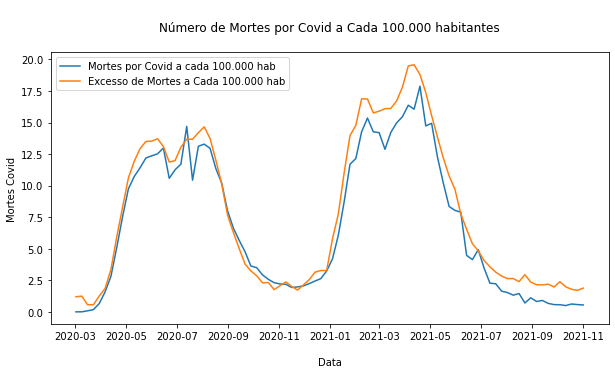

In [86]:
# Plotagem dos gráficos
plt.figure(figsize = (10,5))
plt.plot(peru['data início'], peru['morteCovid100milhab'], label = 'Mortes por Covid a cada 100.000 hab')
plt.plot(peru['data início'], peru['Excesso de Mortes de COVID por 100000hab'], label='Excesso de Mortes a Cada 100.000 hab')
plt.xlabel('\nData')
plt.ylabel('Mortes Covid')
plt.title('\nNúmero de Mortes por Covid a Cada 100.000 habitantes\n')
plt.legend()
plt.show()

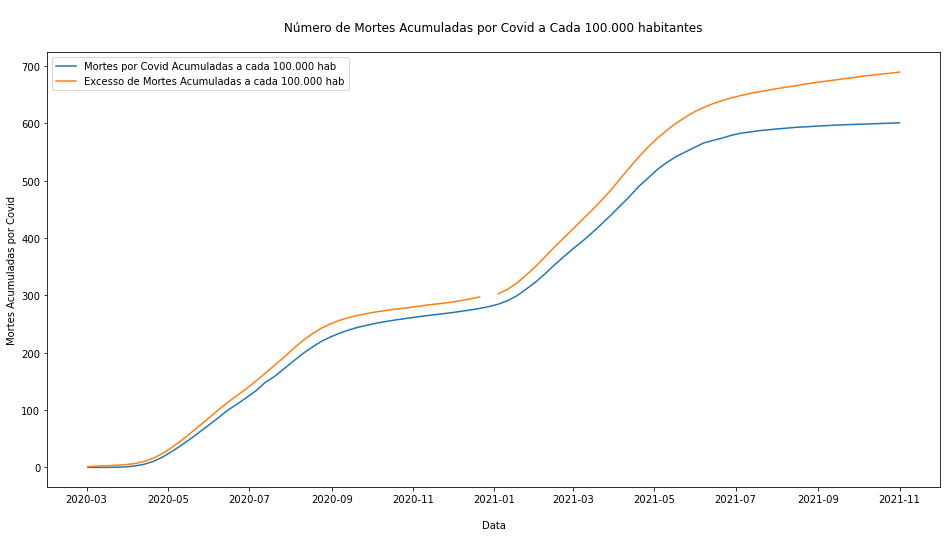

In [23]:
# Plot
plt.figure(figsize = (10,5))
plt.plot(peru['data início'], peru['MortesAcumuladas'], label = 'Mortes por Covid Acumuladas a cada 100.000 hab')
plt.plot(peru['data início'], peru['Excesso de Mortes Acumuladas por COVID a cada 100000 habitantes'], label='Excesso de Mortes Acumuladas a cada 100.000 hab')
plt.xlabel('\nData')
plt.ylabel('Mortes Acumuladas por Covid')
plt.title('\nNúmero de Mortes Acumuladas por Covid a Cada 100.000 habitantes\n')
plt.legend()
plt.show()

Os gráficos apresentam uma falha devido a linhas com dados faltantes, para correção analisarei quantas linhas não apresentam dados e em seguida corrigirei repetindo os valores da última linha preenchida (linha superior). A resolução aqui adotada é similar a adotada no Spreadsheet, onde usei a função IFERROR.

In [24]:
peru.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88 entries, 165 to 252
Data columns (total 14 columns):
 #   Column                                                           Non-Null Count  Dtype         
---  ------                                                           --------------  -----         
 0   país                                                             88 non-null     object        
 1   data início                                                      88 non-null     datetime64[ns]
 2   data fim                                                         88 non-null     datetime64[ns]
 3   dias                                                             88 non-null     int64         
 4   semana                                                           88 non-null     int64         
 5   total mortes reportadas_x                                        88 non-null     int64         
 6   total mortes reportadas por covid                                88 non-null     

Há uma linha com dados ausentes, para correção usarei a mesma medida adotada na análise feita por meio do excel que foi repetir os valores da última linha válida. Logo:

In [25]:
peru.fillna(method = 'ffill', inplace = True)

In [26]:
# Salvando o DataFrame do Peru como planilha do excel
peru.to_excel('Projeto1_-_MortesCOVID/Peru.xlsx')

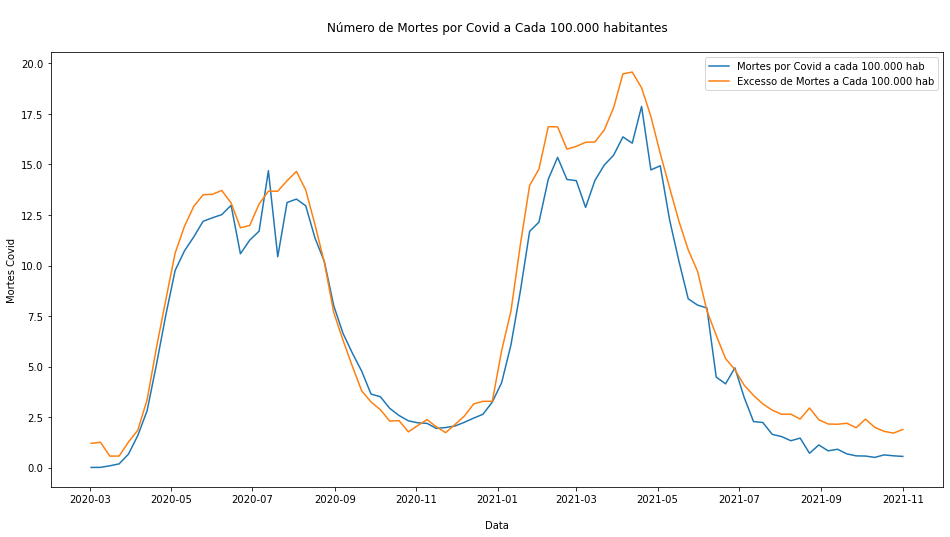

In [27]:
# Plotagem dos gráficos
plt.figure(figsize = (10,5))
plt.plot(peru['data início'], peru['morteCovid100milhab'], label = 'Mortes por Covid a cada 100.000 hab')
plt.plot(peru['data início'], peru['Excesso de Mortes de COVID por 100000hab'], label='Excesso de Mortes a Cada 100.000 hab')
plt.xlabel('\nData')
plt.ylabel('Mortes Covid')
plt.title('\nNúmero de Mortes por Covid a Cada 100.000 habitantes\n')
plt.legend()
plt.show()


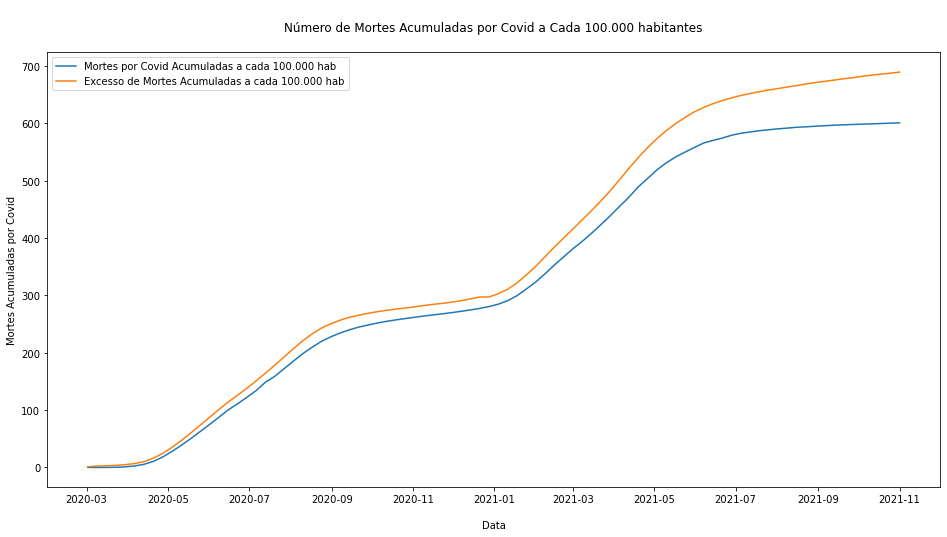

In [28]:
# Plot
plt.figure(figsize = (10,5))
plt.plot(peru['data início'], peru['MortesAcumuladas'], label = 'Mortes por Covid Acumuladas a cada 100.000 hab')
plt.plot(peru['data início'], peru['Excesso de Mortes Acumuladas por COVID a cada 100000 habitantes'], label='Excesso de Mortes Acumuladas a cada 100.000 hab')
plt.xlabel('\nData')
plt.ylabel('Mortes Acumuladas por Covid')
plt.title('\nNúmero de Mortes Acumuladas por Covid a Cada 100.000 habitantes\n')
plt.legend()
plt.show()

## **Chile**

In [29]:
chile = df[df['país'] == 'Chile']

In [30]:
chile['MortesAcumuladas'] = chile['morteCovid100milhab'].cumsum()
chile

,país,data início,data fim,dias,semana,total mortes reportadas,total mortes reportadas por covid,Poblacion,morteCovid100milhab,MortesAcumuladas
607,Chile,2016-01-04,2016-01-10,7,1,1884,0,19212362,0.000000,0.000000
608,Chile,2016-01-11,2016-01-17,7,2,1885,0,19212362,0.000000,0.000000
609,Chile,2016-01-18,2016-01-24,7,3,1916,0,19212362,0.000000,0.000000
610,Chile,2016-01-25,2016-01-31,7,4,1837,0,19212362,0.000000,0.000000
611,Chile,2016-02-01,2016-02-07,7,5,1912,0,19212362,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
905,Chile,2021-09-20,2021-09-26,7,38,2354,81,19212362,0.421604,194.874529
906,Chile,2021-09-27,2021-10-03,7,39,2244,54,19212362,0.281069,195.155598
907,Chile,2021-10-04,2021-10-10,7,40,2316,70,19212362,0.364349,195.519947
908,Chile,2021-10-11,2021-10-17,7,41,2325,45,19212362,0.234224,195.754171


In [31]:
est_morte = chile[chile['total mortes reportadas por covid'] == 0]
est_morte

,país,data início,data fim,dias,semana,total mortes reportadas,total mortes reportadas por covid,Poblacion,morteCovid100milhab,MortesAcumuladas
607,Chile,2016-01-04,2016-01-10,7,1,1884,0,19212362,0.0,0.0
608,Chile,2016-01-11,2016-01-17,7,2,1885,0,19212362,0.0,0.0
609,Chile,2016-01-18,2016-01-24,7,3,1916,0,19212362,0.0,0.0
610,Chile,2016-01-25,2016-01-31,7,4,1837,0,19212362,0.0,0.0
611,Chile,2016-02-01,2016-02-07,7,5,1912,0,19212362,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
821,Chile,2020-02-10,2020-02-16,7,7,1909,0,19212362,0.0,0.0
822,Chile,2020-02-17,2020-02-23,7,8,1899,0,19212362,0.0,0.0
823,Chile,2020-02-24,2020-03-01,7,9,1884,0,19212362,0.0,0.0
824,Chile,2020-03-02,2020-03-08,7,10,1885,0,19212362,0.0,0.0


In [32]:
grupo_semana = est_morte.groupby('semana')

In [33]:
estimativa_pre_covid = grupo_semana['total mortes reportadas'].mean()

In [34]:
chile = pd.merge(chile, estimativa_pre_covid, left_on='semana', right_on='semana', how='left')
chile

,país,data início,data fim,dias,semana,total mortes reportadas_x,total mortes reportadas por covid,Poblacion,morteCovid100milhab,MortesAcumuladas,total mortes reportadas_y
0,Chile,2016-01-04,2016-01-10,7,1,1884,0,19212362,0.000000,0.000000,1967.20
1,Chile,2016-01-11,2016-01-17,7,2,1885,0,19212362,0.000000,0.000000,1885.60
2,Chile,2016-01-18,2016-01-24,7,3,1916,0,19212362,0.000000,0.000000,1926.00
3,Chile,2016-01-25,2016-01-31,7,4,1837,0,19212362,0.000000,0.000000,1920.80
4,Chile,2016-02-01,2016-02-07,7,5,1912,0,19212362,0.000000,0.000000,1925.80
...,...,...,...,...,...,...,...,...,...,...,...
298,Chile,2021-09-20,2021-09-26,7,38,2354,81,19212362,0.421604,194.874529,2213.75
299,Chile,2021-09-27,2021-10-03,7,39,2244,54,19212362,0.281069,195.155598,2122.50
300,Chile,2021-10-04,2021-10-10,7,40,2316,70,19212362,0.364349,195.519947,2069.25
301,Chile,2021-10-11,2021-10-17,7,41,2325,45,19212362,0.234224,195.754171,2005.50


In [35]:
chile = chile[chile['data início'] >= '2020-03-16']
chile

,país,data início,data fim,dias,semana,total mortes reportadas_x,total mortes reportadas por covid,Poblacion,morteCovid100milhab,MortesAcumuladas,total mortes reportadas_y
219,Chile,2020-03-16,2020-03-22,7,12,2008,1,19212362,0.005205,0.005205,1806.00
220,Chile,2020-03-23,2020-03-29,7,13,2006,6,19212362,0.031230,0.036435,1841.50
221,Chile,2020-03-30,2020-04-05,7,14,2081,27,19212362,0.140535,0.176969,1886.50
222,Chile,2020-04-06,2020-04-12,7,15,2010,46,19212362,0.239429,0.416399,1951.50
223,Chile,2020-04-13,2020-04-19,7,16,2087,53,19212362,0.275864,0.692263,1909.00
...,...,...,...,...,...,...,...,...,...,...,...
298,Chile,2021-09-20,2021-09-26,7,38,2354,81,19212362,0.421604,194.874529,2213.75
299,Chile,2021-09-27,2021-10-03,7,39,2244,54,19212362,0.281069,195.155598,2122.50
300,Chile,2021-10-04,2021-10-10,7,40,2316,70,19212362,0.364349,195.519947,2069.25
301,Chile,2021-10-11,2021-10-17,7,41,2325,45,19212362,0.234224,195.754171,2005.50


In [36]:
chile['excesso_morte'] = chile['total mortes reportadas_x'] - chile['total mortes reportadas_y']
chile

,país,data início,data fim,dias,semana,total mortes reportadas_x,total mortes reportadas por covid,Poblacion,morteCovid100milhab,MortesAcumuladas,total mortes reportadas_y,excesso_morte
219,Chile,2020-03-16,2020-03-22,7,12,2008,1,19212362,0.005205,0.005205,1806.00,202.00
220,Chile,2020-03-23,2020-03-29,7,13,2006,6,19212362,0.031230,0.036435,1841.50,164.50
221,Chile,2020-03-30,2020-04-05,7,14,2081,27,19212362,0.140535,0.176969,1886.50,194.50
222,Chile,2020-04-06,2020-04-12,7,15,2010,46,19212362,0.239429,0.416399,1951.50,58.50
223,Chile,2020-04-13,2020-04-19,7,16,2087,53,19212362,0.275864,0.692263,1909.00,178.00
...,...,...,...,...,...,...,...,...,...,...,...,...
298,Chile,2021-09-20,2021-09-26,7,38,2354,81,19212362,0.421604,194.874529,2213.75,140.25
299,Chile,2021-09-27,2021-10-03,7,39,2244,54,19212362,0.281069,195.155598,2122.50,121.50
300,Chile,2021-10-04,2021-10-10,7,40,2316,70,19212362,0.364349,195.519947,2069.25,246.75
301,Chile,2021-10-11,2021-10-17,7,41,2325,45,19212362,0.234224,195.754171,2005.50,319.50


In [37]:
chile['Excesso de Mortes de COVID por 100000hab'] = chile['excesso_morte']*100000/chile['Poblacion']
chile

,país,data início,data fim,dias,semana,total mortes reportadas_x,total mortes reportadas por covid,Poblacion,morteCovid100milhab,MortesAcumuladas,total mortes reportadas_y,excesso_morte,Excesso de Mortes de COVID por 100000hab
219,Chile,2020-03-16,2020-03-22,7,12,2008,1,19212362,0.005205,0.005205,1806.00,202.00,1.051406
220,Chile,2020-03-23,2020-03-29,7,13,2006,6,19212362,0.031230,0.036435,1841.50,164.50,0.856220
221,Chile,2020-03-30,2020-04-05,7,14,2081,27,19212362,0.140535,0.176969,1886.50,194.50,1.012369
222,Chile,2020-04-06,2020-04-12,7,15,2010,46,19212362,0.239429,0.416399,1951.50,58.50,0.304491
223,Chile,2020-04-13,2020-04-19,7,16,2087,53,19212362,0.275864,0.692263,1909.00,178.00,0.926487
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,Chile,2021-09-20,2021-09-26,7,38,2354,81,19212362,0.421604,194.874529,2213.75,140.25,0.729999
299,Chile,2021-09-27,2021-10-03,7,39,2244,54,19212362,0.281069,195.155598,2122.50,121.50,0.632405
300,Chile,2021-10-04,2021-10-10,7,40,2316,70,19212362,0.364349,195.519947,2069.25,246.75,1.284329
301,Chile,2021-10-11,2021-10-17,7,41,2325,45,19212362,0.234224,195.754171,2005.50,319.50,1.662992


In [38]:
chile['Excesso de Mortes Acumuladas por COVID a cada 100000 habitantes'] = chile['Excesso de Mortes de COVID por 100000hab'].cumsum()
chile

,país,data início,data fim,dias,semana,total mortes reportadas_x,total mortes reportadas por covid,Poblacion,morteCovid100milhab,MortesAcumuladas,total mortes reportadas_y,excesso_morte,Excesso de Mortes de COVID por 100000hab,Excesso de Mortes Acumuladas por COVID a cada 100000 habitantes
219,Chile,2020-03-16,2020-03-22,7,12,2008,1,19212362,0.005205,0.005205,1806.00,202.00,1.051406,1.051406
220,Chile,2020-03-23,2020-03-29,7,13,2006,6,19212362,0.031230,0.036435,1841.50,164.50,0.856220,1.907626
221,Chile,2020-03-30,2020-04-05,7,14,2081,27,19212362,0.140535,0.176969,1886.50,194.50,1.012369,2.919995
222,Chile,2020-04-06,2020-04-12,7,15,2010,46,19212362,0.239429,0.416399,1951.50,58.50,0.304491,3.224486
223,Chile,2020-04-13,2020-04-19,7,16,2087,53,19212362,0.275864,0.692263,1909.00,178.00,0.926487,4.150973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,Chile,2021-09-20,2021-09-26,7,38,2354,81,19212362,0.421604,194.874529,2213.75,140.25,0.729999,219.460262
299,Chile,2021-09-27,2021-10-03,7,39,2244,54,19212362,0.281069,195.155598,2122.50,121.50,0.632405,220.092667
300,Chile,2021-10-04,2021-10-10,7,40,2316,70,19212362,0.364349,195.519947,2069.25,246.75,1.284329,221.376997
301,Chile,2021-10-11,2021-10-17,7,41,2325,45,19212362,0.234224,195.754171,2005.50,319.50,1.662992,223.039989


In [39]:
chile.fillna(method = 'ffill', inplace = True)

In [40]:
# Salvando o DataFrame do Chile como planilha do excel
chile.to_excel('Projeto1_-_MortesCOVID/Chile.xlsx')

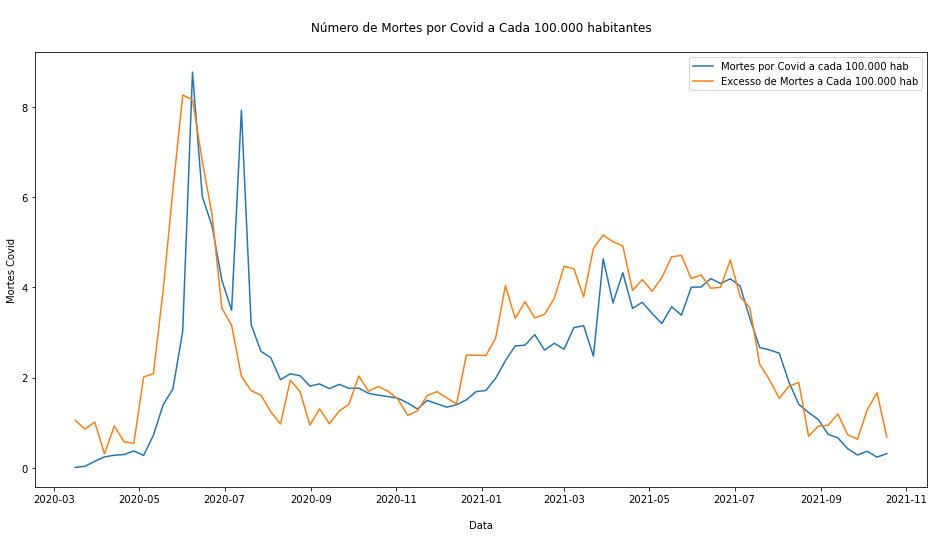

In [41]:
# Plotagem dos gráficos
plt.figure(figsize = (10,5))
plt.plot(chile['data início'], chile['morteCovid100milhab'], label = 'Mortes por Covid a cada 100.000 hab')
plt.plot(chile['data início'], chile['Excesso de Mortes de COVID por 100000hab'], label='Excesso de Mortes a Cada 100.000 hab')
plt.xlabel('\nData')
plt.ylabel('Mortes Covid')
plt.title('\nNúmero de Mortes por Covid a Cada 100.000 habitantes\n')
plt.legend()
plt.show()

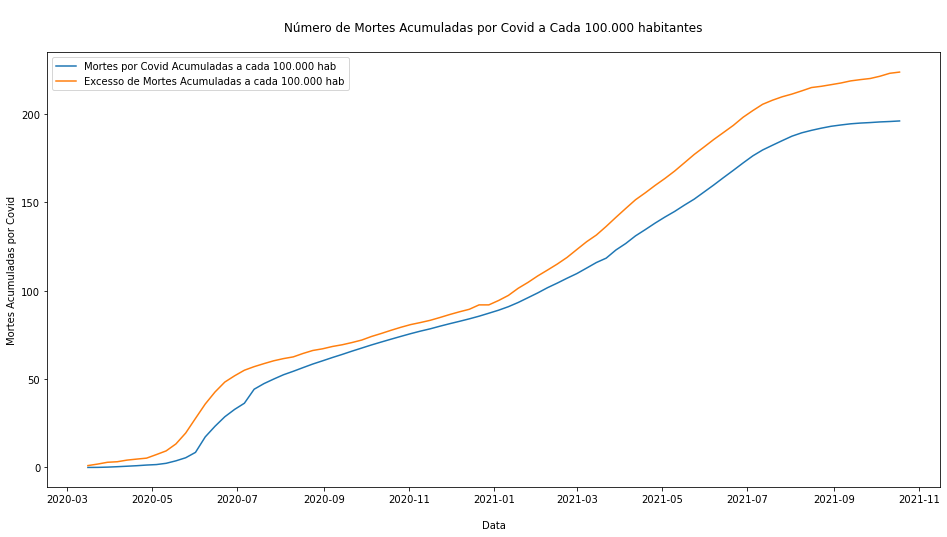

In [42]:
# Plot
plt.figure(figsize = (10,5))
plt.plot(chile['data início'], chile['MortesAcumuladas'], label = 'Mortes por Covid Acumuladas a cada 100.000 hab')
plt.plot(chile['data início'], chile['Excesso de Mortes Acumuladas por COVID a cada 100000 habitantes'], label='Excesso de Mortes Acumuladas a cada 100.000 hab')
plt.xlabel('\nData')
plt.ylabel('Mortes Acumuladas por Covid')
plt.title('\nNúmero de Mortes Acumuladas por Covid a Cada 100.000 habitantes\n')
plt.legend()
plt.show()

## **Brasil**

In [43]:
brasil = df[df['país'] == 'Brazil']

In [44]:
brasil['MortesAcumuladas'] = brasil['morteCovid100milhab'].cumsum()
brasil

,país,data início,data fim,dias,semana,total mortes reportadas,total mortes reportadas por covid,Poblacion,morteCovid100milhab,MortesAcumuladas
1251,Brazil,2015-01-01,2015-01-31,31,1,106695,0,213993441,0.000000,0.000000
1252,Brazil,2015-02-01,2015-02-28,28,2,90612,0,213993441,0.000000,0.000000
1253,Brazil,2015-03-01,2015-03-31,31,3,102473,0,213993441,0.000000,0.000000
1254,Brazil,2015-04-01,2015-04-30,30,4,105114,0,213993441,0.000000,0.000000
1255,Brazil,2015-05-01,2015-05-31,31,5,114042,0,213993441,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
1327,Brazil,2021-05-01,2021-05-31,31,5,178877,59010,213993441,27.575612,216.264105
1328,Brazil,2021-06-01,2021-06-30,30,6,178844,55275,213993441,25.830231,242.094336
1329,Brazil,2021-07-01,2021-07-31,31,7,162439,38304,213993441,17.899614,259.993950
1330,Brazil,2021-08-01,2021-08-31,31,8,149206,24043,213993441,11.235391,271.229341


In [45]:
est_morte = brasil[brasil['total mortes reportadas por covid'] == 0]
est_morte

,país,data início,data fim,dias,semana,total mortes reportadas,total mortes reportadas por covid,Poblacion,morteCovid100milhab,MortesAcumuladas
1251,Brazil,2015-01-01,2015-01-31,31,1,106695,0,213993441,0.0,0.0
1252,Brazil,2015-02-01,2015-02-28,28,2,90612,0,213993441,0.0,0.0
1253,Brazil,2015-03-01,2015-03-31,31,3,102473,0,213993441,0.0,0.0
1254,Brazil,2015-04-01,2015-04-30,30,4,105114,0,213993441,0.0,0.0
1255,Brazil,2015-05-01,2015-05-31,31,5,114042,0,213993441,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1308,Brazil,2019-10-01,2019-10-31,31,10,111532,0,213993441,0.0,0.0
1309,Brazil,2019-11-01,2019-11-30,30,11,105635,0,213993441,0.0,0.0
1310,Brazil,2019-12-01,2019-12-31,31,12,111193,0,213993441,0.0,0.0
1311,Brazil,2020-01-01,2020-01-31,31,1,113395,0,213993441,0.0,0.0


In [46]:
grupo_semana = est_morte.groupby('semana')

In [47]:
estimativa_pre_covid = grupo_semana['total mortes reportadas'].mean()

In [48]:
brasil = pd.merge(brasil, estimativa_pre_covid, left_on='semana', right_on='semana', how='left')
brasil

,país,data início,data fim,dias,semana,total mortes reportadas_x,total mortes reportadas por covid,Poblacion,morteCovid100milhab,MortesAcumuladas,total mortes reportadas_y
0,Brazil,2015-01-01,2015-01-31,31,1,106695,0,213993441,0.000000,0.000000,108233.166667
1,Brazil,2015-02-01,2015-02-28,28,2,90612,0,213993441,0.000000,0.000000,98276.166667
2,Brazil,2015-03-01,2015-03-31,31,3,102473,0,213993441,0.000000,0.000000,108378.600000
3,Brazil,2015-04-01,2015-04-30,30,4,105114,0,213993441,0.000000,0.000000,108504.600000
4,Brazil,2015-05-01,2015-05-31,31,5,114042,0,213993441,0.000000,0.000000,115587.200000
...,...,...,...,...,...,...,...,...,...,...,...
76,Brazil,2021-05-01,2021-05-31,31,5,178877,59010,213993441,27.575612,216.264105,115587.200000
77,Brazil,2021-06-01,2021-06-30,30,6,178844,55275,213993441,25.830231,242.094336,115331.600000
78,Brazil,2021-07-01,2021-07-31,31,7,162439,38304,213993441,17.899614,259.993950,119659.200000
79,Brazil,2021-08-01,2021-08-31,31,8,149206,24043,213993441,11.235391,271.229341,113413.000000


In [49]:
brasil = brasil[brasil['data início'] >= '2020-03-01']
brasil

,país,data início,data fim,dias,semana,total mortes reportadas_x,total mortes reportadas por covid,Poblacion,morteCovid100milhab,MortesAcumuladas,total mortes reportadas_y
62,Brazil,2020-03-01,2020-03-31,31,3,120185,201,213993441,0.093928,0.093928,108378.600000
63,Brazil,2020-04-01,2020-04-30,30,4,125923,5805,213993441,2.712700,2.806628,108504.600000
64,Brazil,2020-05-01,2020-05-31,31,5,156908,23308,213993441,10.891923,13.698551,115587.200000
65,Brazil,2020-06-01,2020-06-30,30,6,142885,30280,213993441,14.149966,27.848517,115331.600000
66,Brazil,2020-07-01,2020-07-31,31,7,147571,32881,213993441,15.365424,43.213941,119659.200000
67,Brazil,2020-08-01,2020-08-31,31,8,143383,28906,213993441,13.507891,56.721832,113413.000000
68,Brazil,2020-09-01,2020-09-30,30,9,128972,22571,213993441,10.547520,67.269351,106914.000000
69,Brazil,2020-10-01,2020-10-31,31,10,130493,15932,213993441,7.445088,74.714439,108218.400000
70,Brazil,2020-11-01,2020-11-30,30,11,124326,13236,213993441,6.185236,80.899676,102370.200000
71,Brazil,2020-12-01,2020-12-31,31,12,141190,21829,213993441,10.200780,91.100456,108400.400000


In [50]:
brasil['excesso_morte'] = brasil['total mortes reportadas_x'] - brasil['total mortes reportadas_y']
brasil

,país,data início,data fim,dias,semana,total mortes reportadas_x,total mortes reportadas por covid,Poblacion,morteCovid100milhab,MortesAcumuladas,total mortes reportadas_y,excesso_morte
62,Brazil,2020-03-01,2020-03-31,31,3,120185,201,213993441,0.093928,0.093928,108378.600000,11806.400000
63,Brazil,2020-04-01,2020-04-30,30,4,125923,5805,213993441,2.712700,2.806628,108504.600000,17418.400000
64,Brazil,2020-05-01,2020-05-31,31,5,156908,23308,213993441,10.891923,13.698551,115587.200000,41320.800000
65,Brazil,2020-06-01,2020-06-30,30,6,142885,30280,213993441,14.149966,27.848517,115331.600000,27553.400000
66,Brazil,2020-07-01,2020-07-31,31,7,147571,32881,213993441,15.365424,43.213941,119659.200000,27911.800000
67,Brazil,2020-08-01,2020-08-31,31,8,143383,28906,213993441,13.507891,56.721832,113413.000000,29970.000000
68,Brazil,2020-09-01,2020-09-30,30,9,128972,22571,213993441,10.547520,67.269351,106914.000000,22058.000000
69,Brazil,2020-10-01,2020-10-31,31,10,130493,15932,213993441,7.445088,74.714439,108218.400000,22274.600000
70,Brazil,2020-11-01,2020-11-30,30,11,124326,13236,213993441,6.185236,80.899676,102370.200000,21955.800000
71,Brazil,2020-12-01,2020-12-31,31,12,141190,21829,213993441,10.200780,91.100456,108400.400000,32789.600000


In [51]:
brasil['Excesso de Mortes de COVID por 100000hab'] = brasil['excesso_morte']*100000/brasil['Poblacion']
brasil

,país,data início,data fim,dias,semana,total mortes reportadas_x,total mortes reportadas por covid,Poblacion,morteCovid100milhab,MortesAcumuladas,total mortes reportadas_y,excesso_morte,Excesso de Mortes de COVID por 100000hab
62,Brazil,2020-03-01,2020-03-31,31,3,120185,201,213993441,0.093928,0.093928,108378.600000,11806.400000,5.517178
63,Brazil,2020-04-01,2020-04-30,30,4,125923,5805,213993441,2.712700,2.806628,108504.600000,17418.400000,8.139689
64,Brazil,2020-05-01,2020-05-31,31,5,156908,23308,213993441,10.891923,13.698551,115587.200000,41320.800000,19.309377
65,Brazil,2020-06-01,2020-06-30,30,6,142885,30280,213993441,14.149966,27.848517,115331.600000,27553.400000,12.875815
66,Brazil,2020-07-01,2020-07-31,31,7,147571,32881,213993441,15.365424,43.213941,119659.200000,27911.800000,13.043297
67,Brazil,2020-08-01,2020-08-31,31,8,143383,28906,213993441,13.507891,56.721832,113413.000000,29970.000000,14.005102
68,Brazil,2020-09-01,2020-09-30,30,9,128972,22571,213993441,10.547520,67.269351,106914.000000,22058.000000,10.307793
69,Brazil,2020-10-01,2020-10-31,31,10,130493,15932,213993441,7.445088,74.714439,108218.400000,22274.600000,10.409011
70,Brazil,2020-11-01,2020-11-30,30,11,124326,13236,213993441,6.185236,80.899676,102370.200000,21955.800000,10.260034
71,Brazil,2020-12-01,2020-12-31,31,12,141190,21829,213993441,10.200780,91.100456,108400.400000,32789.600000,15.322713


In [52]:
brasil['Excesso de Mortes Acumuladas por COVID a cada 100000 habitantes'] = brasil['Excesso de Mortes de COVID por 100000hab'].cumsum()
brasil

,país,data início,data fim,dias,semana,total mortes reportadas_x,total mortes reportadas por covid,Poblacion,morteCovid100milhab,MortesAcumuladas,total mortes reportadas_y,excesso_morte,Excesso de Mortes de COVID por 100000hab,Excesso de Mortes Acumuladas por COVID a cada 100000 habitantes
62,Brazil,2020-03-01,2020-03-31,31,3,120185,201,213993441,0.093928,0.093928,108378.600000,11806.400000,5.517178,5.517178
63,Brazil,2020-04-01,2020-04-30,30,4,125923,5805,213993441,2.712700,2.806628,108504.600000,17418.400000,8.139689,13.656867
64,Brazil,2020-05-01,2020-05-31,31,5,156908,23308,213993441,10.891923,13.698551,115587.200000,41320.800000,19.309377,32.966244
65,Brazil,2020-06-01,2020-06-30,30,6,142885,30280,213993441,14.149966,27.848517,115331.600000,27553.400000,12.875815,45.842059
66,Brazil,2020-07-01,2020-07-31,31,7,147571,32881,213993441,15.365424,43.213941,119659.200000,27911.800000,13.043297,58.885356
67,Brazil,2020-08-01,2020-08-31,31,8,143383,28906,213993441,13.507891,56.721832,113413.000000,29970.000000,14.005102,72.890458
68,Brazil,2020-09-01,2020-09-30,30,9,128972,22571,213993441,10.547520,67.269351,106914.000000,22058.000000,10.307793,83.198251
69,Brazil,2020-10-01,2020-10-31,31,10,130493,15932,213993441,7.445088,74.714439,108218.400000,22274.600000,10.409011,93.607262
70,Brazil,2020-11-01,2020-11-30,30,11,124326,13236,213993441,6.185236,80.899676,102370.200000,21955.800000,10.260034,103.867296
71,Brazil,2020-12-01,2020-12-31,31,12,141190,21829,213993441,10.200780,91.100456,108400.400000,32789.600000,15.322713,119.190008


In [53]:
# Salvando o DataFrame do Brasil como planilha do excel
brasil.to_excel('Projeto1_-_MortesCOVID/Brasil.xlsx')

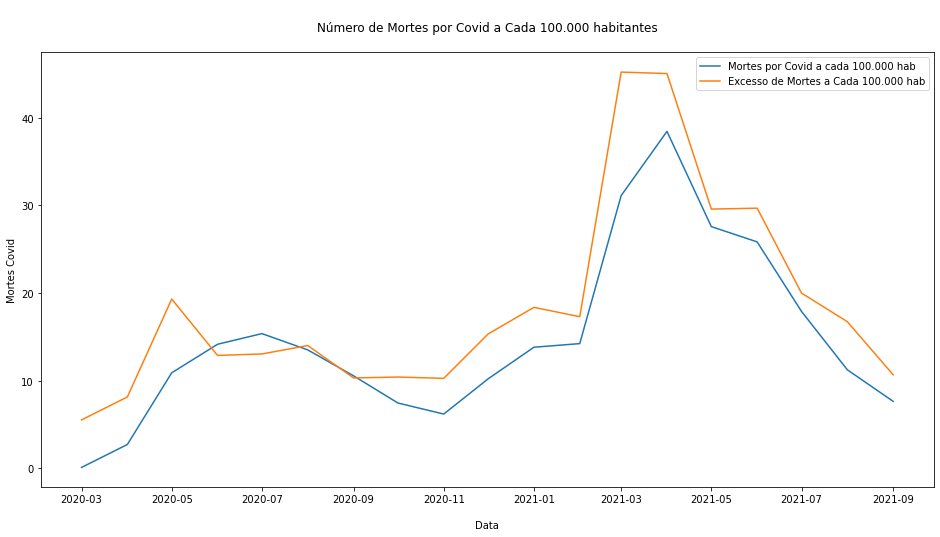

In [54]:
# Plotagem dos gráficos
plt.figure(figsize = (10,5))
plt.plot(brasil['data início'], brasil['morteCovid100milhab'], label = 'Mortes por Covid a cada 100.000 hab')
plt.plot(brasil['data início'], brasil['Excesso de Mortes de COVID por 100000hab'], label='Excesso de Mortes a Cada 100.000 hab')
plt.xlabel('\nData')
plt.ylabel('Mortes Covid')
plt.title('\nNúmero de Mortes por Covid a Cada 100.000 habitantes\n')
plt.legend()
plt.show()

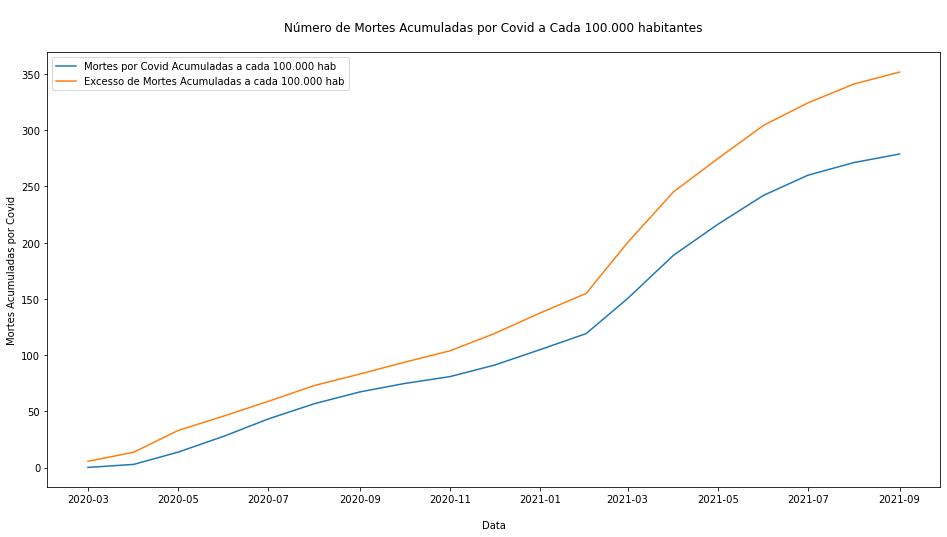

In [55]:
# Plot
plt.figure(figsize = (10,5))
plt.plot(brasil['data início'], brasil['MortesAcumuladas'], label = 'Mortes por Covid Acumuladas a cada 100.000 hab')
plt.plot(brasil['data início'], brasil['Excesso de Mortes Acumuladas por COVID a cada 100000 habitantes'], label='Excesso de Mortes Acumuladas a cada 100.000 hab')
plt.xlabel('\nData')
plt.ylabel('Mortes Acumuladas por Covid')
plt.title('\nNúmero de Mortes Acumuladas por Covid a Cada 100.000 habitantes\n')
plt.legend()
plt.show()

## **México**

In [56]:
mexico = df[df['país'] == 'Mexico']

In [57]:
mexico['MortesAcumuladas'] = mexico['morteCovid100milhab'].cumsum()
mexico

,país,data início,data fim,dias,semana,total mortes reportadas,total mortes reportadas por covid,Poblacion,morteCovid100milhab,MortesAcumuladas
0,Mexico,2014-12-29,2015-01-04,7,1,15101,0,130262220,0.000000,0.000000
1,Mexico,2015-01-05,2015-01-11,7,2,15449,0,130262220,0.000000,0.000000
2,Mexico,2015-01-12,2015-01-18,7,3,14820,0,130262220,0.000000,0.000000
3,Mexico,2015-01-19,2015-01-25,7,4,14172,0,130262220,0.000000,0.000000
4,Mexico,2015-01-26,2015-02-01,7,5,13628,0,130262220,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
349,Mexico,2021-09-06,2021-09-12,7,36,23022,4608,130262220,3.537480,202.265860
350,Mexico,2021-09-13,2021-09-19,7,37,21506,3755,130262220,2.882647,205.148507
351,Mexico,2021-09-20,2021-09-26,7,38,19587,3947,130262220,3.030042,208.178549
352,Mexico,2021-09-27,2021-10-03,7,39,17718,3142,130262220,2.412058,210.590607


In [58]:
est_morte = mexico[mexico['total mortes reportadas por covid'] == 0]
est_morte

,país,data início,data fim,dias,semana,total mortes reportadas,total mortes reportadas por covid,Poblacion,morteCovid100milhab,MortesAcumuladas
0,Mexico,2014-12-29,2015-01-04,7,1,15101,0,130262220,0.0,0.0
1,Mexico,2015-01-05,2015-01-11,7,2,15449,0,130262220,0.0,0.0
2,Mexico,2015-01-12,2015-01-18,7,3,14820,0,130262220,0.0,0.0
3,Mexico,2015-01-19,2015-01-25,7,4,14172,0,130262220,0.0,0.0
4,Mexico,2015-01-26,2015-02-01,7,5,13628,0,130262220,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
267,Mexico,2020-02-10,2020-02-16,7,7,14875,0,130262220,0.0,0.0
268,Mexico,2020-02-17,2020-02-23,7,8,14501,0,130262220,0.0,0.0
269,Mexico,2020-02-24,2020-03-01,7,9,13916,0,130262220,0.0,0.0
270,Mexico,2020-03-02,2020-03-08,7,10,14017,0,130262220,0.0,0.0


In [59]:
grupo_semana = est_morte.groupby('semana')

In [60]:
estimativa_pre_covid = grupo_semana['total mortes reportadas'].mean()

In [61]:
mexico = pd.merge(mexico, estimativa_pre_covid, left_on='semana', right_on='semana', how='left')
mexico

,país,data início,data fim,dias,semana,total mortes reportadas_x,total mortes reportadas por covid,Poblacion,morteCovid100milhab,MortesAcumuladas,total mortes reportadas_y
0,Mexico,2014-12-29,2015-01-04,7,1,15101,0,130262220,0.000000,0.000000,15779.000000
1,Mexico,2015-01-05,2015-01-11,7,2,15449,0,130262220,0.000000,0.000000,15680.000000
2,Mexico,2015-01-12,2015-01-18,7,3,14820,0,130262220,0.000000,0.000000,15454.166667
3,Mexico,2015-01-19,2015-01-25,7,4,14172,0,130262220,0.000000,0.000000,15116.333333
4,Mexico,2015-01-26,2015-02-01,7,5,13628,0,130262220,0.000000,0.000000,15013.500000
...,...,...,...,...,...,...,...,...,...,...,...
349,Mexico,2021-09-06,2021-09-12,7,36,23022,4608,130262220,3.537480,202.265860,12485.600000
350,Mexico,2021-09-13,2021-09-19,7,37,21506,3755,130262220,2.882647,205.148507,12672.200000
351,Mexico,2021-09-20,2021-09-26,7,38,19587,3947,130262220,3.030042,208.178549,12831.200000
352,Mexico,2021-09-27,2021-10-03,7,39,17718,3142,130262220,2.412058,210.590607,12558.400000


In [62]:
mexico = mexico[mexico['data início'] >= '2020-03-16']
mexico

,país,data início,data fim,dias,semana,total mortes reportadas_x,total mortes reportadas por covid,Poblacion,morteCovid100milhab,MortesAcumuladas,total mortes reportadas_y
272,Mexico,2020-03-16,2020-03-22,7,12,13187,3,130262220,0.002303,0.002303,13468.6
273,Mexico,2020-03-23,2020-03-29,7,13,13698,17,130262220,0.013051,0.015354,13175.6
274,Mexico,2020-03-30,2020-04-05,7,14,13533,74,130262220,0.056808,0.072162,13256.6
275,Mexico,2020-04-06,2020-04-12,7,15,14030,202,130262220,0.155072,0.227234,12888.0
276,Mexico,2020-04-13,2020-04-19,7,16,14993,390,130262220,0.299396,0.526630,12754.0
...,...,...,...,...,...,...,...,...,...,...,...
349,Mexico,2021-09-06,2021-09-12,7,36,23022,4608,130262220,3.537480,202.265860,12485.6
350,Mexico,2021-09-13,2021-09-19,7,37,21506,3755,130262220,2.882647,205.148507,12672.2
351,Mexico,2021-09-20,2021-09-26,7,38,19587,3947,130262220,3.030042,208.178549,12831.2
352,Mexico,2021-09-27,2021-10-03,7,39,17718,3142,130262220,2.412058,210.590607,12558.4


In [63]:
mexico['excesso_morte'] = mexico['total mortes reportadas_x'] - mexico['total mortes reportadas_y']
mexico

,país,data início,data fim,dias,semana,total mortes reportadas_x,total mortes reportadas por covid,Poblacion,morteCovid100milhab,MortesAcumuladas,total mortes reportadas_y,excesso_morte
272,Mexico,2020-03-16,2020-03-22,7,12,13187,3,130262220,0.002303,0.002303,13468.6,-281.6
273,Mexico,2020-03-23,2020-03-29,7,13,13698,17,130262220,0.013051,0.015354,13175.6,522.4
274,Mexico,2020-03-30,2020-04-05,7,14,13533,74,130262220,0.056808,0.072162,13256.6,276.4
275,Mexico,2020-04-06,2020-04-12,7,15,14030,202,130262220,0.155072,0.227234,12888.0,1142.0
276,Mexico,2020-04-13,2020-04-19,7,16,14993,390,130262220,0.299396,0.526630,12754.0,2239.0
...,...,...,...,...,...,...,...,...,...,...,...,...
349,Mexico,2021-09-06,2021-09-12,7,36,23022,4608,130262220,3.537480,202.265860,12485.6,10536.4
350,Mexico,2021-09-13,2021-09-19,7,37,21506,3755,130262220,2.882647,205.148507,12672.2,8833.8
351,Mexico,2021-09-20,2021-09-26,7,38,19587,3947,130262220,3.030042,208.178549,12831.2,6755.8
352,Mexico,2021-09-27,2021-10-03,7,39,17718,3142,130262220,2.412058,210.590607,12558.4,5159.6


In [64]:
mexico['Excesso de Mortes de COVID por 100000hab'] = mexico['excesso_morte']*100000/mexico['Poblacion']
mexico

,país,data início,data fim,dias,semana,total mortes reportadas_x,total mortes reportadas por covid,Poblacion,morteCovid100milhab,MortesAcumuladas,total mortes reportadas_y,excesso_morte,Excesso de Mortes de COVID por 100000hab
272,Mexico,2020-03-16,2020-03-22,7,12,13187,3,130262220,0.002303,0.002303,13468.6,-281.6,-0.216179
273,Mexico,2020-03-23,2020-03-29,7,13,13698,17,130262220,0.013051,0.015354,13175.6,522.4,0.401037
274,Mexico,2020-03-30,2020-04-05,7,14,13533,74,130262220,0.056808,0.072162,13256.6,276.4,0.212187
275,Mexico,2020-04-06,2020-04-12,7,15,14030,202,130262220,0.155072,0.227234,12888.0,1142.0,0.876693
276,Mexico,2020-04-13,2020-04-19,7,16,14993,390,130262220,0.299396,0.526630,12754.0,2239.0,1.718841
...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,Mexico,2021-09-06,2021-09-12,7,36,23022,4608,130262220,3.537480,202.265860,12485.6,10536.4,8.088608
350,Mexico,2021-09-13,2021-09-19,7,37,21506,3755,130262220,2.882647,205.148507,12672.2,8833.8,6.781552
351,Mexico,2021-09-20,2021-09-26,7,38,19587,3947,130262220,3.030042,208.178549,12831.2,6755.8,5.186308
352,Mexico,2021-09-27,2021-10-03,7,39,17718,3142,130262220,2.412058,210.590607,12558.4,5159.6,3.960934


In [65]:
mexico['Excesso de Mortes Acumuladas por COVID a cada 100000 habitantes'] = mexico['Excesso de Mortes de COVID por 100000hab'].cumsum()
mexico

,país,data início,data fim,dias,semana,total mortes reportadas_x,total mortes reportadas por covid,Poblacion,morteCovid100milhab,MortesAcumuladas,total mortes reportadas_y,excesso_morte,Excesso de Mortes de COVID por 100000hab,Excesso de Mortes Acumuladas por COVID a cada 100000 habitantes
272,Mexico,2020-03-16,2020-03-22,7,12,13187,3,130262220,0.002303,0.002303,13468.6,-281.6,-0.216179,-0.216179
273,Mexico,2020-03-23,2020-03-29,7,13,13698,17,130262220,0.013051,0.015354,13175.6,522.4,0.401037,0.184858
274,Mexico,2020-03-30,2020-04-05,7,14,13533,74,130262220,0.056808,0.072162,13256.6,276.4,0.212187,0.397045
275,Mexico,2020-04-06,2020-04-12,7,15,14030,202,130262220,0.155072,0.227234,12888.0,1142.0,0.876693,1.273738
276,Mexico,2020-04-13,2020-04-19,7,16,14993,390,130262220,0.299396,0.526630,12754.0,2239.0,1.718841,2.992579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,Mexico,2021-09-06,2021-09-12,7,36,23022,4608,130262220,3.537480,202.265860,12485.6,10536.4,8.088608,505.239253
350,Mexico,2021-09-13,2021-09-19,7,37,21506,3755,130262220,2.882647,205.148507,12672.2,8833.8,6.781552,512.020804
351,Mexico,2021-09-20,2021-09-26,7,38,19587,3947,130262220,3.030042,208.178549,12831.2,6755.8,5.186308,517.207112
352,Mexico,2021-09-27,2021-10-03,7,39,17718,3142,130262220,2.412058,210.590607,12558.4,5159.6,3.960934,521.168046


In [66]:
# Salvando o DataFrame do Mexico como planilha do excel
mexico.to_excel('Projeto1_-_MortesCOVID/Mexico.xlsx')

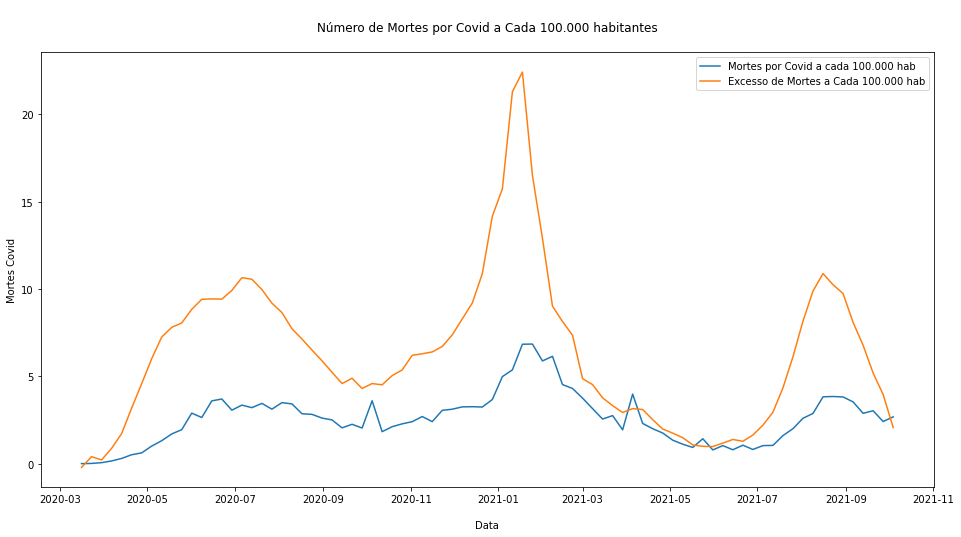

In [67]:
# Plotagem dos gráficos
plt.figure(figsize = (10,5))
plt.plot(mexico['data início'], mexico['morteCovid100milhab'], label = 'Mortes por Covid a cada 100.000 hab')
plt.plot(mexico['data início'], mexico['Excesso de Mortes de COVID por 100000hab'], label='Excesso de Mortes a Cada 100.000 hab')
plt.xlabel('\nData')
plt.ylabel('Mortes Covid')
plt.title('\nNúmero de Mortes por Covid a Cada 100.000 habitantes\n')
plt.legend()
plt.show()

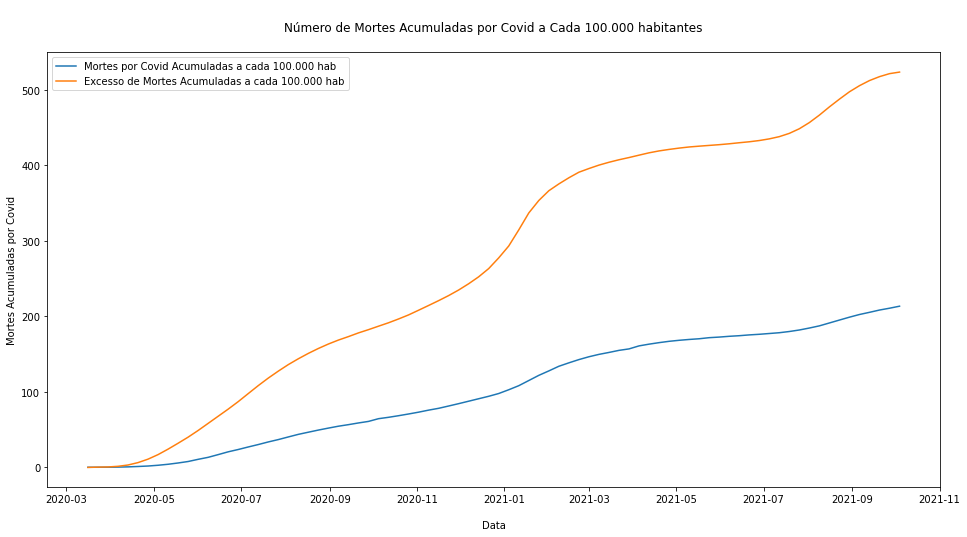

In [68]:
# Plot
plt.figure(figsize = (10,5))
plt.plot(mexico['data início'], mexico['MortesAcumuladas'], label = 'Mortes por Covid Acumuladas a cada 100.000 hab')
plt.plot(mexico['data início'], mexico['Excesso de Mortes Acumuladas por COVID a cada 100000 habitantes'], label='Excesso de Mortes Acumuladas a cada 100.000 hab')
plt.xlabel('\nData')
plt.ylabel('Mortes Acumuladas por Covid')
plt.title('\nNúmero de Mortes Acumuladas por Covid a Cada 100.000 habitantes\n')
plt.legend()
plt.show()

## **Colômbia**

In [69]:
colombia = df[df['país'] == 'Colombia']

In [70]:
colombia['MortesAcumuladas'] = colombia['morteCovid100milhab'].cumsum()
colombia

,país,data início,data fim,dias,semana,total mortes reportadas,total mortes reportadas por covid,Poblacion,morteCovid100milhab,MortesAcumuladas
910,Colombia,2014-12-29,2015-01-04,7,1,4746,0,51265841,0.000000,0.000000
911,Colombia,2015-01-05,2015-01-11,7,2,4588,0,51265841,0.000000,0.000000
912,Colombia,2015-01-12,2015-01-18,7,3,4525,0,51265841,0.000000,0.000000
913,Colombia,2015-01-19,2015-01-25,7,4,4280,0,51265841,0.000000,0.000000
914,Colombia,2015-01-26,2015-02-01,7,5,4185,0,51265841,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
1246,Colombia,2021-06-07,2021-06-13,7,23,10081,3817,51265841,7.445504,186.826156
1247,Colombia,2021-06-14,2021-06-20,7,24,10451,4156,51265841,8.106763,194.932918
1248,Colombia,2021-06-21,2021-06-27,7,25,10456,4744,51265841,9.253725,204.186644
1249,Colombia,2021-06-28,2021-07-04,7,26,10240,4218,51265841,8.227701,212.414344


In [71]:
est_morte = colombia[colombia['total mortes reportadas por covid'] == 0]
est_morte

,país,data início,data fim,dias,semana,total mortes reportadas,total mortes reportadas por covid,Poblacion,morteCovid100milhab,MortesAcumuladas
910,Colombia,2014-12-29,2015-01-04,7,1,4746,0,51265841,0.0,0.0
911,Colombia,2015-01-05,2015-01-11,7,2,4588,0,51265841,0.0,0.0
912,Colombia,2015-01-12,2015-01-18,7,3,4525,0,51265841,0.0,0.0
913,Colombia,2015-01-19,2015-01-25,7,4,4280,0,51265841,0.0,0.0
914,Colombia,2015-01-26,2015-02-01,7,5,4185,0,51265841,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1177,Colombia,2020-02-10,2020-02-16,7,7,4699,0,51265841,0.0,0.0
1178,Colombia,2020-02-17,2020-02-23,7,8,4693,0,51265841,0.0,0.0
1179,Colombia,2020-02-24,2020-03-01,7,9,4520,0,51265841,0.0,0.0
1180,Colombia,2020-03-02,2020-03-08,7,10,4534,0,51265841,0.0,0.0


In [72]:
grupo_semana = est_morte.groupby('semana')

In [73]:
estimativa_pre_covid = grupo_semana['total mortes reportadas'].mean()

In [74]:
colombia = pd.merge(colombia, estimativa_pre_covid, left_on='semana', right_on='semana', how='left')
colombia

,país,data início,data fim,dias,semana,total mortes reportadas_x,total mortes reportadas por covid,Poblacion,morteCovid100milhab,MortesAcumuladas,total mortes reportadas_y
0,Colombia,2014-12-29,2015-01-04,7,1,4746,0,51265841,0.000000,0.000000,4853.333333
1,Colombia,2015-01-05,2015-01-11,7,2,4588,0,51265841,0.000000,0.000000,4660.666667
2,Colombia,2015-01-12,2015-01-18,7,3,4525,0,51265841,0.000000,0.000000,4653.166667
3,Colombia,2015-01-19,2015-01-25,7,4,4280,0,51265841,0.000000,0.000000,4519.500000
4,Colombia,2015-01-26,2015-02-01,7,5,4185,0,51265841,0.000000,0.000000,4406.333333
...,...,...,...,...,...,...,...,...,...,...,...
336,Colombia,2021-06-07,2021-06-13,7,23,10081,3817,51265841,7.445504,186.826156,4542.600000
337,Colombia,2021-06-14,2021-06-20,7,24,10451,4156,51265841,8.106763,194.932918,4514.800000
338,Colombia,2021-06-21,2021-06-27,7,25,10456,4744,51265841,9.253725,204.186644,4554.600000
339,Colombia,2021-06-28,2021-07-04,7,26,10240,4218,51265841,8.227701,212.414344,4592.000000


In [75]:
colombia = colombia[colombia['data início'] >= '2020-03-16']
colombia

,país,data início,data fim,dias,semana,total mortes reportadas_x,total mortes reportadas por covid,Poblacion,morteCovid100milhab,MortesAcumuladas,total mortes reportadas_y
272,Colombia,2020-03-16,2020-03-22,7,12,4499,2,51265841,0.003901,0.003901,4296.8
273,Colombia,2020-03-23,2020-03-29,7,13,4337,8,51265841,0.015605,0.019506,4316.4
274,Colombia,2020-03-30,2020-04-05,7,14,4190,25,51265841,0.048765,0.068272,4278.0
275,Colombia,2020-04-06,2020-04-12,7,15,4255,74,51265841,0.144346,0.212617,4255.0
276,Colombia,2020-04-13,2020-04-19,7,16,4355,70,51265841,0.136543,0.349160,4262.8
...,...,...,...,...,...,...,...,...,...,...,...
336,Colombia,2021-06-07,2021-06-13,7,23,10081,3817,51265841,7.445504,186.826156,4542.6
337,Colombia,2021-06-14,2021-06-20,7,24,10451,4156,51265841,8.106763,194.932918,4514.8
338,Colombia,2021-06-21,2021-06-27,7,25,10456,4744,51265841,9.253725,204.186644,4554.6
339,Colombia,2021-06-28,2021-07-04,7,26,10240,4218,51265841,8.227701,212.414344,4592.0


In [76]:
colombia['excesso_morte'] = colombia['total mortes reportadas_x'] - colombia['total mortes reportadas_y']
colombia

,país,data início,data fim,dias,semana,total mortes reportadas_x,total mortes reportadas por covid,Poblacion,morteCovid100milhab,MortesAcumuladas,total mortes reportadas_y,excesso_morte
272,Colombia,2020-03-16,2020-03-22,7,12,4499,2,51265841,0.003901,0.003901,4296.8,202.2
273,Colombia,2020-03-23,2020-03-29,7,13,4337,8,51265841,0.015605,0.019506,4316.4,20.6
274,Colombia,2020-03-30,2020-04-05,7,14,4190,25,51265841,0.048765,0.068272,4278.0,-88.0
275,Colombia,2020-04-06,2020-04-12,7,15,4255,74,51265841,0.144346,0.212617,4255.0,0.0
276,Colombia,2020-04-13,2020-04-19,7,16,4355,70,51265841,0.136543,0.349160,4262.8,92.2
...,...,...,...,...,...,...,...,...,...,...,...,...
336,Colombia,2021-06-07,2021-06-13,7,23,10081,3817,51265841,7.445504,186.826156,4542.6,5538.4
337,Colombia,2021-06-14,2021-06-20,7,24,10451,4156,51265841,8.106763,194.932918,4514.8,5936.2
338,Colombia,2021-06-21,2021-06-27,7,25,10456,4744,51265841,9.253725,204.186644,4554.6,5901.4
339,Colombia,2021-06-28,2021-07-04,7,26,10240,4218,51265841,8.227701,212.414344,4592.0,5648.0


In [77]:
colombia['Excesso de Mortes de COVID por 100000hab'] = colombia['excesso_morte']*100000/colombia['Poblacion']
colombia

,país,data início,data fim,dias,semana,total mortes reportadas_x,total mortes reportadas por covid,Poblacion,morteCovid100milhab,MortesAcumuladas,total mortes reportadas_y,excesso_morte,Excesso de Mortes de COVID por 100000hab
272,Colombia,2020-03-16,2020-03-22,7,12,4499,2,51265841,0.003901,0.003901,4296.8,202.2,0.394415
273,Colombia,2020-03-23,2020-03-29,7,13,4337,8,51265841,0.015605,0.019506,4316.4,20.6,0.040183
274,Colombia,2020-03-30,2020-04-05,7,14,4190,25,51265841,0.048765,0.068272,4278.0,-88.0,-0.171654
275,Colombia,2020-04-06,2020-04-12,7,15,4255,74,51265841,0.144346,0.212617,4255.0,0.0,0.000000
276,Colombia,2020-04-13,2020-04-19,7,16,4355,70,51265841,0.136543,0.349160,4262.8,92.2,0.179847
...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,Colombia,2021-06-07,2021-06-13,7,23,10081,3817,51265841,7.445504,186.826156,4542.6,5538.4,10.803295
337,Colombia,2021-06-14,2021-06-20,7,24,10451,4156,51265841,8.106763,194.932918,4514.8,5936.2,11.579250
338,Colombia,2021-06-21,2021-06-27,7,25,10456,4744,51265841,9.253725,204.186644,4554.6,5901.4,11.511369
339,Colombia,2021-06-28,2021-07-04,7,26,10240,4218,51265841,8.227701,212.414344,4592.0,5648.0,11.017083


In [78]:
colombia['Excesso de Mortes Acumuladas por COVID a cada 100000 habitantes'] = colombia['Excesso de Mortes de COVID por 100000hab'].cumsum()
colombia

,país,data início,data fim,dias,semana,total mortes reportadas_x,total mortes reportadas por covid,Poblacion,morteCovid100milhab,MortesAcumuladas,total mortes reportadas_y,excesso_morte,Excesso de Mortes de COVID por 100000hab,Excesso de Mortes Acumuladas por COVID a cada 100000 habitantes
272,Colombia,2020-03-16,2020-03-22,7,12,4499,2,51265841,0.003901,0.003901,4296.8,202.2,0.394415,0.394415
273,Colombia,2020-03-23,2020-03-29,7,13,4337,8,51265841,0.015605,0.019506,4316.4,20.6,0.040183,0.434597
274,Colombia,2020-03-30,2020-04-05,7,14,4190,25,51265841,0.048765,0.068272,4278.0,-88.0,-0.171654,0.262943
275,Colombia,2020-04-06,2020-04-12,7,15,4255,74,51265841,0.144346,0.212617,4255.0,0.0,0.000000,0.262943
276,Colombia,2020-04-13,2020-04-19,7,16,4355,70,51265841,0.136543,0.349160,4262.8,92.2,0.179847,0.442790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,Colombia,2021-06-07,2021-06-13,7,23,10081,3817,51265841,7.445504,186.826156,4542.6,5538.4,10.803295,274.457086
337,Colombia,2021-06-14,2021-06-20,7,24,10451,4156,51265841,8.106763,194.932918,4514.8,5936.2,11.579250,286.036336
338,Colombia,2021-06-21,2021-06-27,7,25,10456,4744,51265841,9.253725,204.186644,4554.6,5901.4,11.511369,297.547705
339,Colombia,2021-06-28,2021-07-04,7,26,10240,4218,51265841,8.227701,212.414344,4592.0,5648.0,11.017083,308.564787


In [79]:
# Salvando o DataFrame da Colombia como planilha do excel
colombia.to_excel('Projeto1_-_MortesCOVID/Colombia.xlsx')

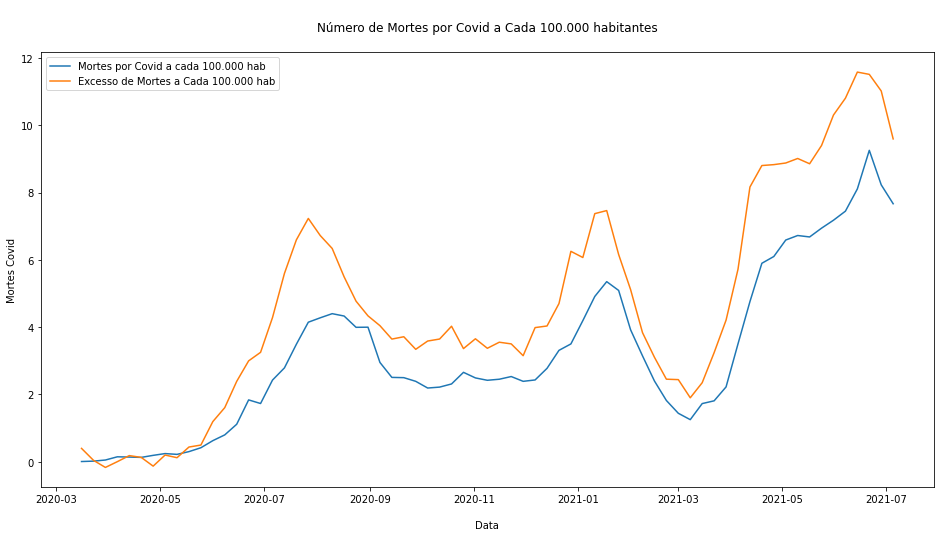

In [80]:
# Plotagem dos gráficos
plt.figure(figsize = (10,5))
plt.plot(colombia['data início'], colombia['morteCovid100milhab'], label = 'Mortes por Covid a cada 100.000 hab')
plt.plot(colombia['data início'], colombia['Excesso de Mortes de COVID por 100000hab'], label='Excesso de Mortes a Cada 100.000 hab')
plt.xlabel('\nData')
plt.ylabel('Mortes Covid')
plt.title('\nNúmero de Mortes por Covid a Cada 100.000 habitantes\n')
plt.legend()
plt.show()

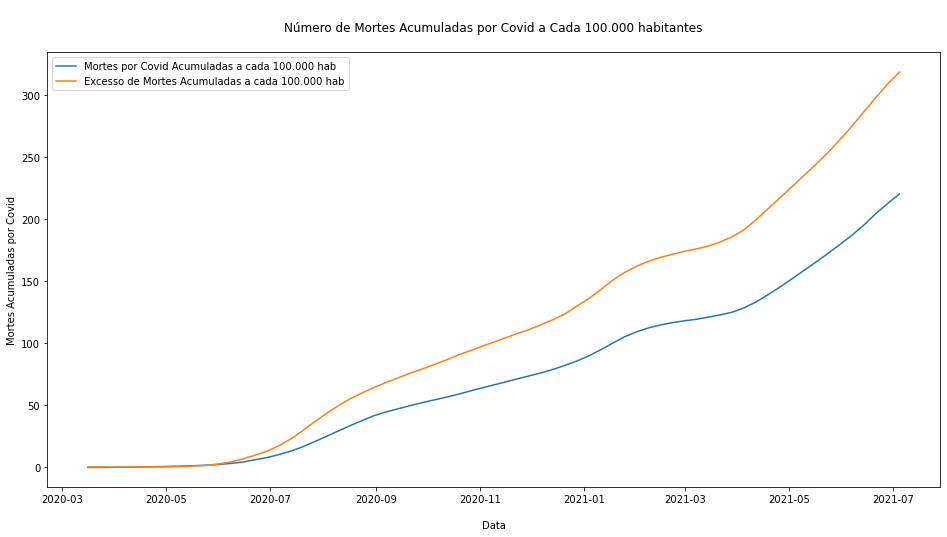

In [81]:
# Plot
plt.figure(figsize = (10,5))
plt.plot(colombia['data início'], colombia['MortesAcumuladas'], label = 'Mortes por Covid Acumuladas a cada 100.000 hab')
plt.plot(colombia['data início'], colombia['Excesso de Mortes Acumuladas por COVID a cada 100000 habitantes'], label='Excesso de Mortes Acumuladas a cada 100.000 hab')
plt.xlabel('\nData')
plt.ylabel('Mortes Acumuladas por Covid')
plt.title('\nNúmero de Mortes Acumuladas por Covid a Cada 100.000 habitantes\n')
plt.legend()
plt.show()

# Construção do Entregável

- Tabela comparativa com o total de óbitos reportados pela COVID-19 por 100.000 habitantes, o total de "óbitos excedentes" por 100.000 habitantes e a diferença entre os dois valores, por país.

- Um gráfico que exibe os dados da tabela acima em forma de gráfico de barras.

- Um gráfico para cada país que mostra a comparação da evolução ao longo do tempo das mortes relatadas de COVID-19 x o cálculo dos “excessos de óbitos” semana a semana, ambos dados por 100.000 habitantes.

- Um gráfico para cada país que mostra as mesmas variáveis do ​ ponto anterior, mas acumuladas ao longo do tempo.

In [82]:
# Construindo a tabela
data = {'País': ['Peru', 'Chile', 'Brasil', 'México', 'Colômbia'], 
        'Total de Mortes por COVID/100.000 hab.': [(peru['morteCovid100milhab'].sum()), (chile['morteCovid100milhab'].sum()), 
                                                                    (brasil['morteCovid100milhab'].sum()), (mexico['morteCovid100milhab'].sum()), 
                                                                    (colombia['morteCovid100milhab'].sum())], 
        'Excesso de Mortes/100.000 hab.': [(peru['Excesso de Mortes de COVID por 100000hab'].sum()), (chile['Excesso de Mortes de COVID por 100000hab'].sum()),
                                                  (brasil['Excesso de Mortes de COVID por 100000hab'].sum()), (mexico['Excesso de Mortes de COVID por 100000hab'].sum()), 
                                                  (colombia['Excesso de Mortes de COVID por 100000hab'].sum())]}

## Tabela com os dados por país

In [83]:
tabela = pd.DataFrame(data=data)
tabela['Diferença'] = (tabela['Excesso de Mortes/100.000 hab.']-tabela['Total de Mortes por COVID/100.000 hab.'])
tabela

,País,Total de Mortes por COVID/100.000 hab.,Excesso de Mortes/100.000 hab.,Diferença
0,Peru,600.819888,692.614564,91.794675
1,Chile,196.066470,226.216329,30.149859
2,Brasil,278.863220,351.741746,72.878527
3,México,213.272889,523.238639,309.965750
4,Colômbia,220.080267,318.157920,98.077652


## Gráfico do total de mortes por país

<AxesSubplot:title={'center':'Grouped Bar Graph with dataframe'}, xlabel='País'>

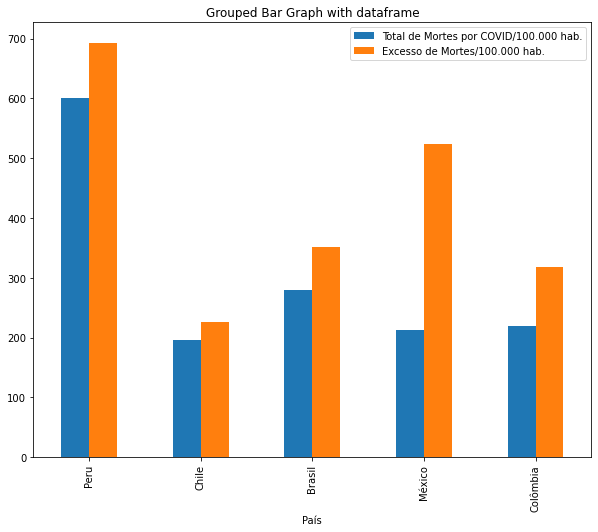

In [84]:
tabela.plot(figsize=(10,8), x='País',
        y=['Total de Mortes por COVID/100.000 hab.', 'Excesso de Mortes/100.000 hab.'],
        kind='bar', 
        stacked=False, 
        title='Grouped Bar Graph with dataframe') 

## Gráficos para cada um dos países comparando as mortes por Covid e o excesso de mortes

Text(0.5, 0.98, 'Mortes por Covid e Excesso de Mortes a cada 100.000 habitantes')

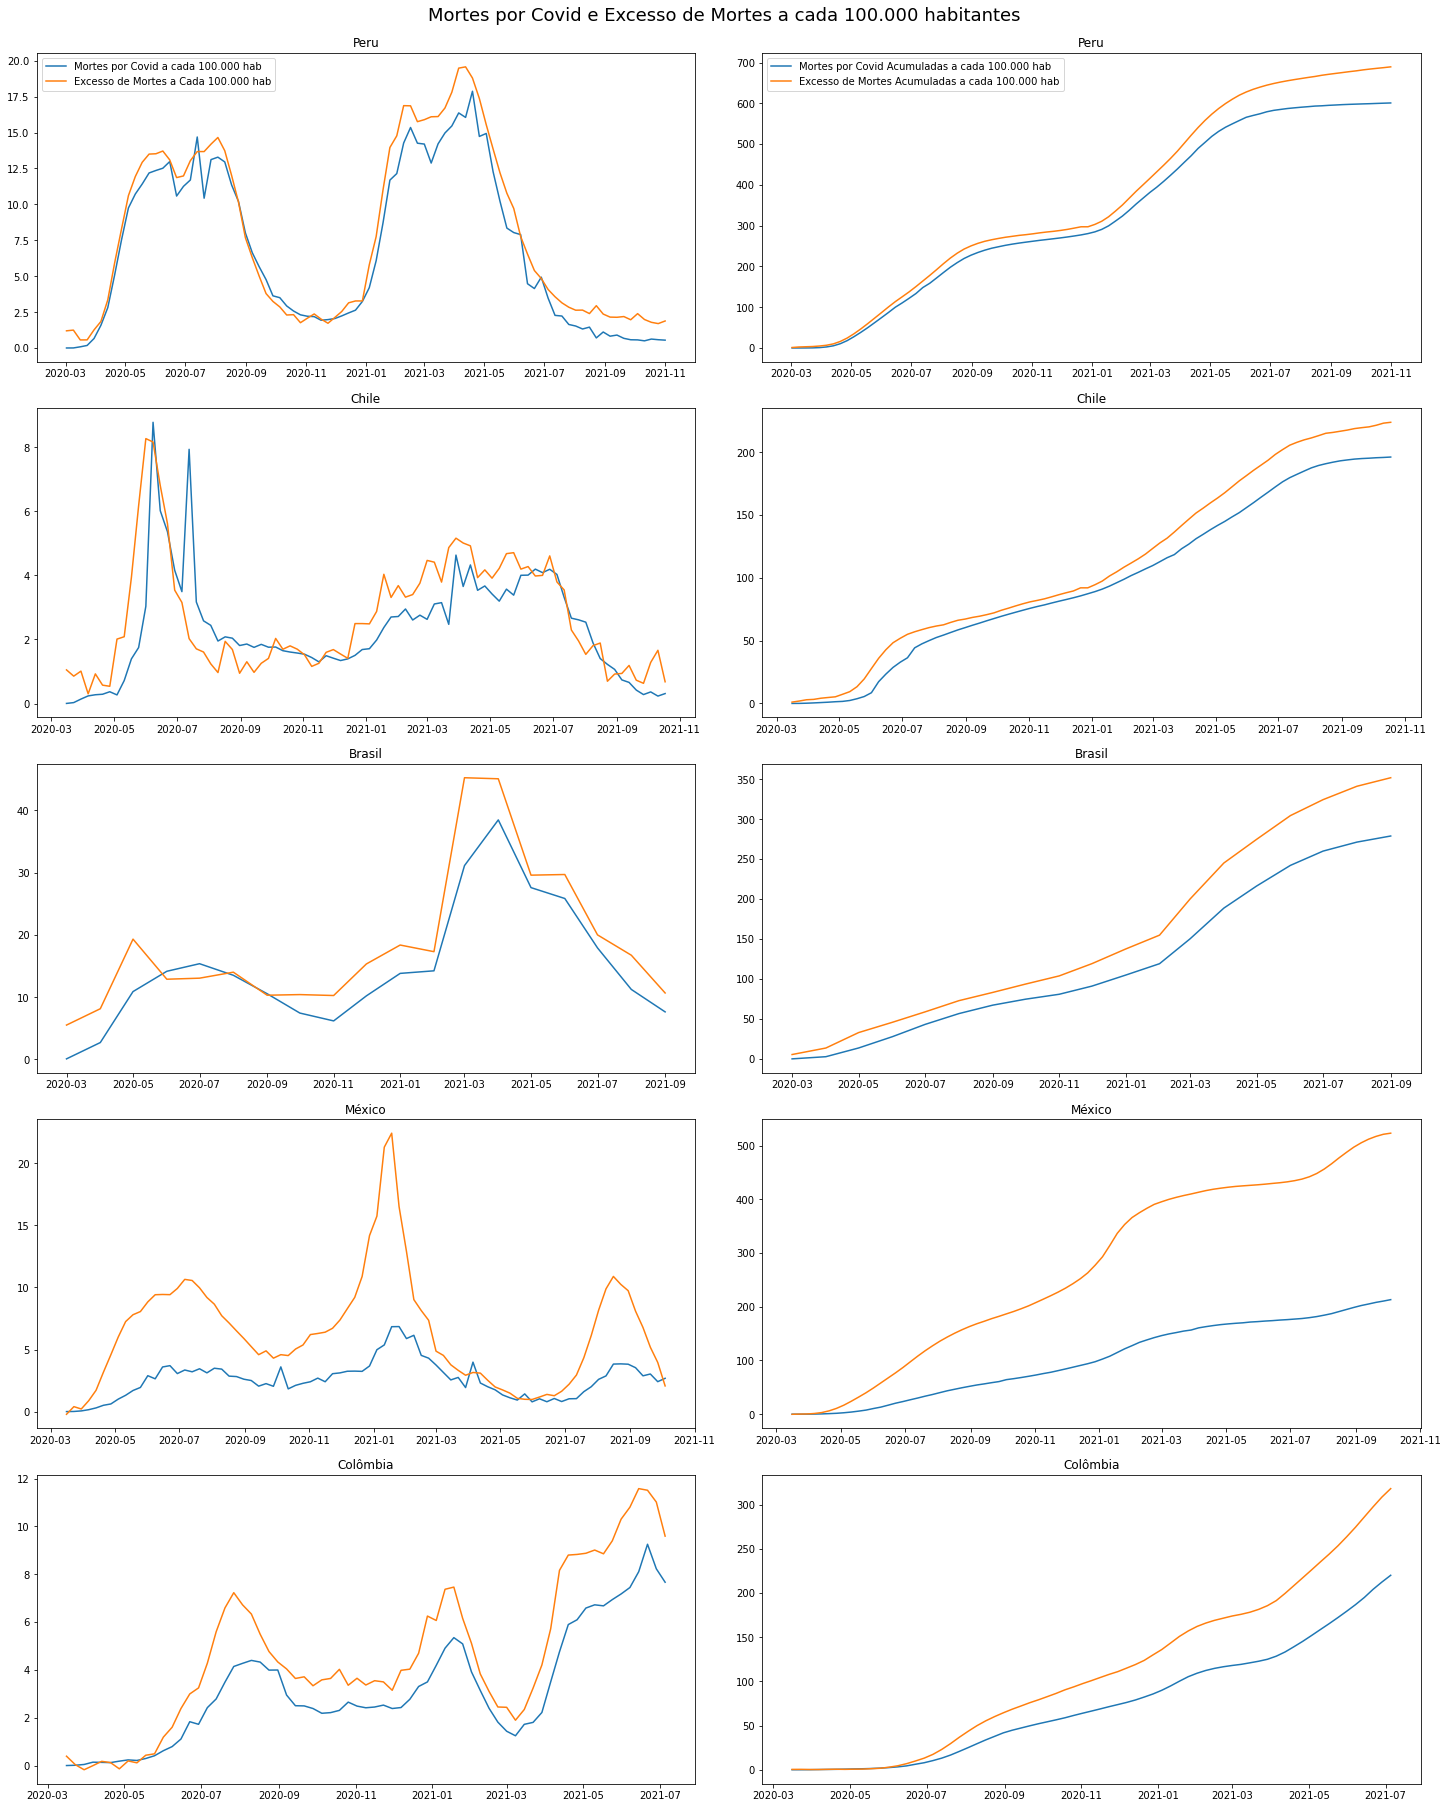

In [85]:
area = plt.figure(figsize = (20, 25), constrained_layout=True)
spec = area.add_gridspec(ncols=2, nrows=5)

g1 = area.add_subplot(spec[0, 0])
g2 = area.add_subplot(spec[1, 0])
g3 = area.add_subplot(spec[2, 0])
g4 = area.add_subplot(spec[3, 0])
g5 = area.add_subplot(spec[4, 0])
g6 = area.add_subplot(spec[0, 1])
g7 = area.add_subplot(spec[1, 1])
g8 = area.add_subplot(spec[2, 1])
g9 = area.add_subplot(spec[3, 1])
g10 = area.add_subplot(spec[4, 1])

g1.plot(peru['data início'], peru['morteCovid100milhab'], label = 'Mortes por Covid a cada 100.000 hab')
g1.plot(peru['data início'], peru['Excesso de Mortes de COVID por 100000hab'], label='Excesso de Mortes a Cada 100.000 hab')
g1.set_title('Peru')
g1.legend()

g2.plot(chile['data início'], chile['morteCovid100milhab'])
g2.plot(chile['data início'], chile['Excesso de Mortes de COVID por 100000hab'])
g2.set_title('Chile')

g3.plot(brasil['data início'], brasil['morteCovid100milhab'])
g3.plot(brasil['data início'], brasil['Excesso de Mortes de COVID por 100000hab'])
g3.set_title('Brasil')

g4.plot(mexico['data início'], mexico['morteCovid100milhab'])
g4.plot(mexico['data início'], mexico['Excesso de Mortes de COVID por 100000hab'])
g4.set_title('México')

g5.plot(colombia['data início'], colombia['morteCovid100milhab'])
g5.plot(colombia['data início'], colombia['Excesso de Mortes de COVID por 100000hab'])
g5.set_title('Colômbia')

g6.plot(peru['data início'], peru['MortesAcumuladas'], label = 'Mortes por Covid Acumuladas a cada 100.000 hab')
g6.plot(peru['data início'], peru['Excesso de Mortes Acumuladas por COVID a cada 100000 habitantes'], label='Excesso de Mortes Acumuladas a cada 100.000 hab')
g6.set_title('Peru')
g6.legend()

g7.plot(chile['data início'], chile['MortesAcumuladas'])
g7.plot(chile['data início'], chile['Excesso de Mortes Acumuladas por COVID a cada 100000 habitantes'])
g7.set_title('Chile')

g8.plot(brasil['data início'], brasil['MortesAcumuladas'])
g8.plot(brasil['data início'], brasil['Excesso de Mortes Acumuladas por COVID a cada 100000 habitantes'])
g8.set_title('Brasil')

g9.plot(mexico['data início'], mexico['MortesAcumuladas'])
g9.plot(mexico['data início'], mexico['Excesso de Mortes Acumuladas por COVID a cada 100000 habitantes'])
g9.set_title('México')

g10.plot(colombia['data início'], colombia['MortesAcumuladas'])
g10.plot(colombia['data início'], colombia['Excesso de Mortes Acumuladas por COVID a cada 100000 habitantes'])
g10.set_title('Colômbia')

area.suptitle('Mortes por Covid e Excesso de Mortes a cada 100.000 habitantes', fontsize=18)


## Considerações finais

Cheguei ao fim do Projeto e a partir dele pude observar que:
- O Peru apresentou o maior número de mortes por Covid.
- O México apresentou a maior diferença entre o número de mortes reportadas por Covid e o excesso de mortes ao longo do período pandêmico.
- O Chile apresentou a menor diferença entre o número de mortes reportadas e o número de mortes em excesso.
- Chile, Brasil e México apresentam **dois** picos acentuados no gráfico que compara a quantidade de mortes reportadas como Covid-19 e o excesso de mortes no período pandêmico, os quais coincidem com a detecção de novas variantes do vírus na América Latina. Enquanto isso, Colômbia e México apresentam **três** picos.